# Project overview
This project is based on a dataset about movie ratings on Kaggle.com and the goal is to perform end-to-end data processing, from data extraction, cleaning, visualization, to using different machine learning models and make predictions. The models are aiming for making predictions on average rating.

Analysis processes:

- Data import and preprocessing
- Exploratory Data Analysis (EDA)
- Visualizations
- Feature engineering
- Predictive modeling
- Conclusion

# Imports/Setup
Run the following cells to set up the notebook.


In [ ]:
# import packages
import json
import glob
import pandas as pd
import numpy as np
import datetime as dt
import re
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import MonthLocator, DateFormatter
import seaborn as sns
from matplotlib import cm
from google.colab import drive
from sklearn.model_selection import train_test_split
from collections import Counter
import seaborn as sns

In [ ]:
%%capture
!apt update
!pip install kaggle

# **Part I:** Preprocessing and EDA

## **1.1** Data Loading and Preprocessing

### **1.1.1** Read Data

We are using one CSV for our final project, `TMDB_all_movies.csv` from a Kaggle [dataset](https://www.kaggle.com/datasets/alanvourch/tmdb-movies-daily-updates?resource=download).

To get the data in here:
1. Go to this [Kaggle link](https://www.kaggle.com) and create a Kaggle account (unless you already have one)
2. Go to Account and click on "Create New API Token" to get the API key in the form of a json file `kaggle.json`
3. Upload the `kaggle.json` file to the default location in your Google Drive, 'MyDrive' (Please **DO NOT** upload the json file into any _specific_ folder as it will be difficult for us to debug issues if you deviate from these instructions!).

Run the following cells to allow Colab to connect to Kaggle and to download the data used in this final project.

In [ ]:
# Run this cell to mount your drive (you will be prompted to sign in)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Create the kaggle directory and
# (NOTE: Do NOT run this cell more than once unless restarting kernel)
!mkdir ~/.kaggle

In [ ]:
# Read the uploaded kaggle.json file
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [ ]:
# Download dataset
!!kaggle datasets download -d alanvourch/tmdb-movies-daily-updates

['Dataset URL: https://www.kaggle.com/datasets/alanvourch/tmdb-movies-daily-updates',
 'License(s): Apache 2.0',
 'Downloading tmdb-movies-daily-updates.zip to /content',
 '',
 '  0% 0.00/218M [00:00<?, ?B/s]',
 '  2% 5.00M/218M [00:00<00:05, 38.8MB/s]',
 ' 11% 25.0M/218M [00:00<00:01, 119MB/s] ',
 ' 21% 46.0M/218M [00:00<00:01, 159MB/s]',
 ' 28% 62.0M/218M [00:00<00:01, 98.0MB/s]',
 ' 37% 81.0M/218M [00:00<00:01, 115MB/s] ',
 ' 45% 97.0M/218M [00:00<00:01, 121MB/s]',
 ' 51% 111M/218M [00:00<00:00, 123MB/s] ',
 ' 57% 124M/218M [00:01<00:00, 104MB/s]',
 ' 66% 144M/218M [00:01<00:00, 128MB/s]',
 ' 74% 161M/218M [00:01<00:00, 139MB/s]',
 ' 82% 179M/218M [00:01<00:00, 152MB/s]',
 ' 90% 195M/218M [00:01<00:00, 107MB/s]',
 ' 97% 210M/218M [00:01<00:00, 115MB/s]',
 '',
 '100% 218M/218M [00:01<00:00, 120MB/s]']

In [ ]:
# Unzip folder in Colab content folder
!unzip /content/tmdb-movies-daily-updates.zip

Archive:  /content/tmdb-movies-daily-updates.zip
  inflating: TMDB_all_movies.csv     


In [ ]:
# Read the csv file and save it to a dataframe
raw = pd.read_csv("TMDB_all_movies.csv")
# raw = pd.read_csv("/content/drive/MyDrive/Final Project/TMDB_all_movies.csv")

In [ ]:
# display all columns
pd.set_option('display.max_columns', None)
# Peak at the first five rows
raw.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,cast,director,director_of_photography,writers,producers,music_composer,imdb_rating,imdb_votes
0,2,Ariel,7.107,326.0,Released,1988-10-21,0.0,73.0,0.0,tt0094675,fi,Ariel,After the coal mine he works at closes and his...,26.345,NaN,"Drama, Comedy, Romance, Crime",Villealfa Filmproductions,Finland,suomi,"Eino Kuusela, Olli Varja, Kauko Laalo, Hannu K...",Aki Kaurismäki,Timo Salminen,Aki Kaurismäki,Aki Kaurismäki,NaN,7.4,8545.0
1,3,Shadows in Paradise,7.300,368.0,Released,1986-10-17,0.0,74.0,0.0,tt0092149,fi,Varjoja paratiisissa,"Nikander, a rubbish collector and would-be ent...",22.666,NaN,"Comedy, Drama, Romance",Villealfa Filmproductions,Finland,"suomi, English, svenska","Ari Korhonen, Pekka Laiho, Jukka-Pekka Palo, K...",Aki Kaurismäki,Timo Salminen,Aki Kaurismäki,Mika Kaurismäki,NaN,7.5,7286.0
2,5,Four Rooms,5.800,2578.0,Released,1995-12-09,4257354.0,98.0,4000000.0,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,24.747,Twelve outrageous guests. Four scandalous requ...,Comedy,"Miramax, A Band Apart",United States of America,English,"Kimberly Blair, Sammi Davis, Paul Skemp, Bruce...","Alexandre Rockwell, Quentin Tarantino, Allison...","Andrzej Sekula, Rodrigo García, Guillermo Nava...","Alexandre Rockwell, Quentin Tarantino, Allison...","Alexandre Rockwell, Lawrence Bender, Quentin T...",Combustible Edison,6.7,111710.0
3,6,Judgment Night,6.500,326.0,Released,1993-10-15,12136938.0,109.0,21000000.0,tt0107286,en,Judgment Night,"Four young friends, while taking a shortcut en...",14.955,Don't move. Don't whisper. Don't even breathe.,"Action, Crime, Thriller","Largo Entertainment, JVC, Universal Pictures",United States of America,English,"Doug Wert, Michael DeLorenzo, Everlast, Christ...",Stephen Hopkins,Peter Levy,"Jere Cunningham, Lewis Colick","Marilyn Vance, Gene Levy, Lloyd Segan",Alan Silvestri,6.6,19024.0
4,8,Life in Loops (A Megacities RMX),7.500,27.0,Released,2006-01-01,0.0,80.0,42000.0,tt0825671,en,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...,3.203,A Megacities remix.,Documentary,inLoops,Austria,"English, हिन्दी, 日本語, Pусский, Español",NaN,Timo Novotny,Wolfgang Thaler,"Michael Glawogger, Timo Novotny","Ulrich Gehmacher, Timo Novotny",NaN,8.1,282.0


In [ ]:
# Convert release_date to a datetime object
raw['release_date'] = pd.to_datetime(raw['release_date'])

### **1.1.2** Check Nulls and Duplicates

We will find the number of rows with null values and the number of duplicated rows.

In [ ]:
# Find number of rows with null values
num_nulls = raw.isnull().any(axis=1).sum()
num_nulls

937828

In [ ]:
# Find number of duplicated rows
num_dups = raw.duplicated().sum()
num_dups

0

## **1.2** EDA

Exploratory Data Analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.


### **1.2.1** Check For Data Irregularity


In [ ]:
# Display the datatypes in raw data
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962239 entries, 0 to 962238
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       962239 non-null  int64         
 1   title                    962231 non-null  object        
 2   vote_average             962237 non-null  float64       
 3   vote_count               962237 non-null  float64       
 4   status                   962237 non-null  object        
 5   release_date             867300 non-null  datetime64[ns]
 6   revenue                  962237 non-null  float64       
 7   runtime                  962237 non-null  float64       
 8   budget                   962237 non-null  float64       
 9   imdb_id                  572562 non-null  object        
 10  original_language        962237 non-null  object        
 11  original_title           962230 non-null  object        
 12  overview        

In [ ]:
nrow = raw.shape[0]
nrow

962239

Drop movies with null value for `Title`

In [ ]:
raw = raw[raw['title'].isnull()==False]

#### 1.2.1a Check Categorical Variables

In [ ]:
raw.shape

(962231, 27)

In [ ]:
display(pd.crosstab(index=raw['writers'], columns='% observations', normalize='columns').sort_values(by = ['% observations'], ascending = False)*100)

col_0,% observations
writers,
William Shakespeare,0.061076
Kuninori Yamazaki,0.044789
Gilbert M. Anderson,0.043717
John W. Dunn,0.037074
Safa Önal,0.033002
...,...
"Hideji Hōjō, Hajime Takaiwa",0.000214
"Hideichi Nagahara, Toshiya Fujita, Satoshi Funachi",0.000214
"Hideichi Nagahara, Toshio Masuda",0.000214


In [ ]:
# Frequency tables for each categorical feature
for column in ['status', 'genres', 'original_language', 'production_countries', 'production_companies', 'writers', 'director']:
    display(pd.crosstab(index=raw[column], columns='% observations', normalize='columns').sort_values(by = ['% observations'], ascending = False)*100)

col_0,% observations
status,
Released,98.383964
In Production,0.510584
Post Production,0.477016
Planned,0.476289
Rumored,0.103925
Canceled,0.048221


col_0,% observations
genres,
Documentary,19.877422
Drama,15.367551
Comedy,8.489786
Animation,4.653437
Music,3.763473
...,...
"Documentary, Adventure, Drama, Comedy",0.000146
"Documentary, Adventure, Family, History",0.000146
"Documentary, Adventure, Fantasy, Family, Mystery, Thriller",0.000146


col_0,% observations
original_language,
en,50.398813
fr,6.315427
es,5.701645
de,4.811215
ja,4.360699
...,...
kj,0.000104
kv,0.000104
nr,0.000104


col_0,% observations
production_countries,
United States of America,23.691548
Japan,6.184747
United Kingdom,5.698830
France,5.437521
Germany,5.194393
...,...
"France, Slovenia, Germany",0.000170
"Bosnia and Herzegovina, Luxembourg, Montenegro, Serbia, Slovenia",0.000170
"France, Slovakia, Czech Republic, Poland, Hungary, Germany",0.000170


col_0,% observations
production_companies,
BBC,0.525731
ONF | NFB,0.503966
Metro-Goldwyn-Mayer,0.457294
Columbia Pictures,0.442036
Toei Company,0.405686
...,...
Joan C. Gratz Productions,0.000224
Joan Ricart i Lluís Manyoses,0.000224
JoanJoan,0.000224


col_0,% observations
writers,
William Shakespeare,0.061076
Kuninori Yamazaki,0.044789
Gilbert M. Anderson,0.043717
John W. Dunn,0.037074
Safa Önal,0.033002
...,...
"Hideji Hōjō, Hajime Takaiwa",0.000214
"Hideichi Nagahara, Toshiya Fujita, Satoshi Funachi",0.000214
"Hideichi Nagahara, Toshio Masuda",0.000214


col_0,% observations
director,
Dave Fleischer,0.066274
D.W. Griffith,0.055333
Stan Brakhage,0.046907
Gilbert M. Anderson,0.046907
Kevin Dunn,0.046781
...,...
James Bai,0.000126
James Bailey,0.000126
James Bainbridge,0.000126


#### 1.2.1b Check Date Variable

In [ ]:
# Movies released but have no release date: 92% have 0 votes, most have <20 votes ===> drop these movies
no_release_date = raw[(raw['status']=="Released") & (raw['release_date'].isnull())]
no_release_date.vote_count.value_counts(normalize=True).sort_index()

vote_count
0.0      0.924943
1.0      0.062485
2.0      0.007605
3.0      0.002173
4.0      0.001135
5.0      0.000561
6.0      0.000220
7.0      0.000085
8.0      0.000110
9.0      0.000098
10.0     0.000073
11.0     0.000024
12.0     0.000049
13.0     0.000037
14.0     0.000073
15.0     0.000012
16.0     0.000024
17.0     0.000012
18.0     0.000012
19.0     0.000037
20.0     0.000012
21.0     0.000012
23.0     0.000012
24.0     0.000024
26.0     0.000012
27.0     0.000012
28.0     0.000012
30.0     0.000012
31.0     0.000012
36.0     0.000012
37.0     0.000012
38.0     0.000024
40.0     0.000012
44.0     0.000012
98.0     0.000012
108.0    0.000012
198.0    0.000012
Name: proportion, dtype: float64

In [ ]:
no_release_date.shape[0]

81924

In [ ]:
# Release date range:
raw.loc[(raw['release_date'].isnull()==False)&(raw['status']=="Released"), 'release_date'].agg(['min', 'max'])


min   1800-01-01
max   2026-11-06
Name: release_date, dtype: datetime64[ns]

In [ ]:
# Confirm the oldest movies are real:
raw.loc[raw['release_date']< dt.datetime(1900, 1, 1)].sort_values(by='release_date')

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,cast,director,director_of_photography,writers,producers,music_composer,imdb_rating,imdb_votes
936742,1294302,בראול סטארס בחיים האמיתיים-אלון קאט,0.000,0.0,Released,1800-01-01,100000000.0,0.0,0.0,NaN,he,בראול סטארס בחיים האמיתיים-אלון קאט,NaN,0.600,NaN,"Horror, Drama, Thriller, Mystery, War",Salty Fish,NaN,NaN,"הילדים של קפטן בן, קפטן בן, ?, המפיקה",אלון מועלם,אלון מועלם,אלון מועלם,NaN,NaN,NaN,NaN
903615,1256924,Felix Nadar Spinning in his Chair,0.000,0.0,Released,1865-01-01,0.0,1.0,0.0,NaN,en,Felix Nadar Spinning in his Chair,Felix Nadar Spinning in his Chair,0.751,The frames that spun!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197806,315946,Passage of Venus,6.152,105.0,Released,1874-12-09,0.0,1.0,0.0,tt3155794,fr,Passage de Venus,Photo sequence of the rare transit of Venus ov...,6.444,NaN,Documentary,NaN,France,No Language,NaN,P.J.C. Janssen,NaN,NaN,NaN,NaN,6.8,2117.0
655980,922073,Le Repas des Poulets,4.000,3.0,Released,1878-05-07,0.0,1.0,0.0,NaN,xx,Le Repas des Poulets,Praxinoscope animation of a woman feeding chic...,0.755,NaN,Animation,NaN,France,No Language,NaN,Émile Reynaud,NaN,NaN,NaN,NaN,NaN,NaN
656254,922511,Le Jongleur,4.200,4.0,Released,1878-05-07,0.0,1.0,0.0,NaN,xx,Le Jongleur,Praxinoscope animation of a juggler balancing ...,0.600,NaN,Animation,NaN,France,No Language,NaN,Émile Reynaud,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948219,1307436,Lord Roberts Leaving For South Africa,5.000,1.0,Released,1899-12-23,0.0,1.0,0.0,NaN,en,Lord Roberts Leaving For South Africa,An actuality and reportage film. This film cap...,0.931,NaN,"Documentary, War",Warwick Trading Company,NaN,NaN,"Roberts, Lord Frederick (1832-1914), Roberts, ...",NaN,NaN,NaN,Warwick Trading Company,NaN,NaN,NaN
471385,665847,Les mines de charbon de Hon Gay,0.000,0.0,Released,1899-12-28,0.0,1.0,0.0,tt11657292,fr,Les mines de charbon de Hon Gay,Local workers climb the slope pushing carts.,1.127,NaN,Documentary,Lumière,France,No Language,NaN,Gabriel Veyre,NaN,NaN,"Auguste Lumière, Louis Lumière",NaN,5.0,8.0
106960,179537,The Kiss in the Tunnel,5.200,17.0,Released,1899-12-31,0.0,1.0,0.0,tt0257839,en,The Kiss in the Tunnel,"A train heads for a tunnel. In one car, a rest...",1.400,NaN,NaN,Bamforth Films,United Kingdom,NaN,NaN,James Bamforth,NaN,NaN,NaN,NaN,5.3,464.0
156897,268410,Le vieux Paris: Vue prise en bateau,5.600,11.0,Released,1899-12-31,0.0,1.0,0.0,tt3177214,en,Le vieux Paris: Vue prise en bateau,"Paris seen from a boat, in this Lumière short ...",0.600,NaN,NaN,Lumière,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.4,108.0


#### 1.2.1c Check Numeric Variables

In [ ]:
raw.describe()

,id,vote_average,vote_count,release_date,revenue,runtime,budget,popularity,imdb_rating,imdb_votes
count,9.622310e+05,962231.000000,962231.000000,867297,9.622310e+05,962231.000000,9.622310e+05,962231.000000,418357.000000,4.183570e+05
mean,6.839310e+05,2.197183,24.057977,1999-03-20 01:17:54.362761600,8.076838e+05,46.294502,3.155529e+05,2.166712,6.253872,2.825023e+03
min,2.000000e+00,0.000000,0.000000,1800-01-01 00:00:00,-1.200000e+01,0.000000,0.000000e+00,0.000000,1.000000,5.000000e+00
25%,3.672005e+05,0.000000,0.000000,1987-01-25 00:00:00,0.000000e+00,2.000000,0.000000e+00,0.600000,5.500000,2.000000e+01
50%,6.783930e+05,0.000000,0.000000,2010-05-11 00:00:00,0.000000e+00,25.000000,0.000000e+00,0.854000,6.400000,6.000000e+01
75%,1.015424e+06,5.200000,1.000000,2019-02-01 00:00:00,0.000000e+00,87.000000,0.000000e+00,1.476000,7.100000,2.690000e+02
max,1.323046e+06,10.000000,36053.000000,2115-11-18 00:00:00,3.000000e+09,14400.000000,6.456547e+08,7285.790000,10.000000,2.920811e+06
std,3.786849e+05,3.113438,366.239508,NaN,1.836949e+07,58.476753,5.017687e+06,14.770634,1.310703,3.155059e+04


In [ ]:
raw.dtypes

id                                  int64
title                              object
vote_average                      float64
vote_count                        float64
status                             object
release_date               datetime64[ns]
revenue                           float64
runtime                           float64
budget                            float64
imdb_id                            object
original_language                  object
original_title                     object
overview                           object
popularity                        float64
tagline                            object
genres                             object
production_companies               object
production_countries               object
spoken_languages                   object
cast                               object
director                           object
director_of_photography            object
writers                            object
producers                         

In [ ]:
# Range of numeric variables: vote_average, vote_count, revenue, budget, popularity, runtime
for column in ['vote_average', 'vote_count', 'revenue', 'budget', 'popularity', 'runtime']:
    max, q3, med, q1, min = np.percentile(raw.loc[:,column], [100, 75, 50, 25, 0])
    display([column, min, q1, med, q3, max])

['vote_average', 0.0, 0.0, 0.0, 5.2, 10.0]

['vote_count', 0.0, 0.0, 0.0, 1.0, 36053.0]

['revenue', -12.0, 0.0, 0.0, 0.0, 3000000000.0]

['budget', 0.0, 0.0, 0.0, 0.0, 645654654.0]

['popularity', 0.0, 0.6, 0.854, 1.476, 7285.79]

['runtime', 0.0, 2.0, 25.0, 87.0, 14400.0]

##### Vote_count and vote_average

In [ ]:
# How many movies have 0 vote_count? A LOT! => Drop these data.
raw[raw['vote_count']==0.0].shape[0]

608913

In [ ]:
raw[raw['vote_count']==0.0].shape[0] / nrow

0.632808481053044

In [ ]:
# Erroneous data: vote_count= 0 but vote_average>0 => Drop these data.
raw[(raw['vote_count']==0.0)&(raw['vote_average']>0.0)].head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,cast,director,director_of_photography,writers,producers,music_composer,imdb_rating,imdb_votes
2437,4230,Scary Texas Movie,4.0,0.0,Released,1997-01-01,0.0,72.0,0.0,tt0128457,en,Scary Texas Movie,NaN,0.610,NaN,Horror,NaN,United States of America,English,"Katie Gratson, Martin Salisbury, Mark Hanson, ...",Brad Keller,Jackson W. Saunders,John Steakley,Brad Keller,NaN,4.6,26.0
23480,37519,Confessions,3.0,0.0,Released,2006-07-23,0.0,104.0,975000.0,tt0820858,en,Confessions,Confessions of a Call Girl is a revealing stor...,1.657,When Love Isn't Enough,"Drama, Thriller, Crime, Mystery, Romance",Cowboy Hat Films,United States of America,English,"Lynn Whitfield, Bokeem Woodbine, Katrin Redfer...",Lawrence Page,NaN,Lawrence Page,Lawrence Page,NaN,2.8,195.0
27742,42753,Business for Pleasure,1.0,0.0,Released,1997-07-01,0.0,90.0,0.0,tt0115790,en,Business for Pleasure,"A voyeuristic tycoon orchestrates a risky, pas...",1.862,An offer she couldn't refuse... Desire beyond ...,"TV Movie, Drama","The Zalman King Company, AFRA Film Enterprises...",United States of America,English,"Jeroen Krabbé, Barbara McEly, Joanna Pacula, C...",Rafael Eisenman,Eagle Egilsson,Zalman King,"Anatoly Fradis, Zalman King",George S. Clinton,4.8,159.0
27909,42956,Beethoven Symphony No. 9,9.0,0.0,Released,1977-12-31,0.0,68.0,0.0,NaN,en,Beethoven Symphony No. 9,Karajan's very best video Beethoven 9th Sympho...,1.460,NaN,Music,Deutsche Grammophon,Germany,Deutsch,"Anna Tomowa-Sintow, José van Dam, Berliner Phi...",Humphrey Burton,NaN,Friedrich Schiller,NaN,NaN,NaN,NaN
29980,45321,Douchebag,2.0,0.0,Released,2010-10-01,0.0,81.0,0.0,tt1535568,en,Douchebag,"On the verge of getting married, Sam Nussbaum ...",0.911,NaN,"Comedy, Drama",Super Crispy Entertainment,NaN,NaN,"Andrew Dickler, Marguerite Moreau, Wendi McLen...",Drake Doremus,NaN,"Drake Doremus, Lindsay Stidham, Andrew Dickler...","Marius Markevicius, Jonathan Schwartz",NaN,6.0,181.0


In [ ]:
# Check: vote_average=0 ==> Drop these movies
raw[raw['vote_average']==0.0].value_counts(['vote_count'])

vote_count
0.0           608203
1.0              945
2.0               21
3.0                5
Name: count, dtype: int64

In [ ]:
# Check: vote_average ==0 but vote_count >0:
raw[(raw['vote_average']==0.0)&(raw['vote_count']>0.0)].head(10)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,cast,director,director_of_photography,writers,producers,music_composer,imdb_rating,imdb_votes
9060,15164,"Baby Songs - ABC, 123, Colors & Shapes",0.0,1.0,Released,2003-06-03,0.0,57.0,0.0,NaN,en,"Baby Songs - ABC, 123, Colors & Shapes","Children's music legend, Hap Palmer, has pione...",0.600,Featuring the Songs of Hap Palmer,Family,NaN,NaN,English,Hap Palmer,Amy Weintraub,NaN,NaN,NaN,NaN,NaN,NaN
10627,17642,The Leopard Son,0.0,1.0,Released,1996-09-27,0.0,87.0,0.0,tt0116859,en,The Leopard Son,"The true story of the birth, growth and coming...",0.956,NaN,Documentary,NaN,"Netherlands, United States of America",English,John Gielgud,Hugo van Lawick,NaN,NaN,NaN,Stewart Copeland,7.4,174.0
14581,24638,Carol Burnett: Show Stoppers,0.0,1.0,Released,2001-11-26,0.0,60.0,0.0,tt0302389,en,Carol Burnett: Show Stoppers,"Originally broadcast on CBS in 2001, this affe...",0.668,NaN,Comedy,NaN,United States of America,English,"Tim Conway, Harvey Korman, Vicki Lawrence, Car...",R. Paul Miller,NaN,NaN,"Rick Hawkins, Carol Burnett, Mary Jo Blue, Jod...",NaN,7.9,193.0
18212,29505,Expendable,0.0,1.0,Released,2003-08-14,0.0,56.0,2000.0,tt0387208,en,Expendable,David is a drug dealer who pays a final visit ...,0.892,Time changes everything... and David's is runn...,"Drama, Horror, Romance",NaN,United States of America,English,"Rachelle Williams, Ryli Morgan, Mark Baranowsk...",Mark Baranowski,Mark Baranowski,Mark Baranowski,"Ryli Morgan, Mark Baranowski",Mark Baranowski,5.1,32.0
25401,40019,Barack Obama: The Power of Change (2008) (V),0.0,1.0,Released,NaT,0.0,0.0,0.0,tt1333980,en,Barack Obama: The Power of Change (2008) (V),Barack Obama in the words of his 2008 presiden...,0.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.2,38.0
26537,41399,WillFull,0.0,1.0,Released,2002-08-29,0.0,96.0,0.0,tt0281370,en,WillFull,Catherine (Anna Lise Phillips) returns to Aust...,1.244,Sometimes death can be the beginning of a beau...,"Comedy, Fantasy",NaN,Australia,English,"Nick Atkinson, Ellesha Dobbs, Vina Lee, Anne L...",Rebel Penfold-Russell,Steve Arnold,Harry Cripps,NaN,NaN,6.1,76.0
26901,41840,Tom Wilson: Bigger Than You,0.0,2.0,Released,2011-12-09,0.0,0.0,0.0,tt1559325,en,Tom Wilson: Bigger Than You,This live concert by stand-up comedian Tom Wil...,1.432,NaN,Comedy,NaN,NaN,NaN,Thomas F. Wilson,Manny Rodriguez,NaN,Thomas F. Wilson,NaN,NaN,7.0,117.0
32519,48511,The Courier,0.0,1.0,Released,1988-02-10,0.0,85.0,0.0,tt0094912,en,The Courier,When a courier at the D-Day Courier Service mi...,1.794,NaN,"Action, Crime, Thriller","Fís Éireann/Screen Ireland, City Vision, Eusto...","Ireland, United Kingdom","English, Gaeilge","Aidan Gillen, Anne Enright, Robbie Graden, Ton...","Joe Lee, Frank Deasy",NaN,Frank Deasy,"Nik Powell, Neil Jordan, Stephen Woolley, John...",NaN,5.4,140.0
34609,51133,Love!,0.0,1.0,Released,1994-01-01,0.0,14.0,0.0,tt0109107,pt,Amor!,A funny yet bitter panorama of the several pos...,1.043,NaN,NaN,NaN,Brazil,Português,"Guilherme Karan, Paulo César Peréio, Rosi Camp...",José Roberto Torero,José Roberto Eliezer,José Roberto Torero,Zita Carvalhosa,NaN,6.8,49.0
39775,57817,Red River,0.0,1.0,Released,2011-05-05,0.0,77.0,5000.0,tt1498568,en,Red River,Set in a small town in the backwoods of Kentuc...,1.243,The River Runs Red with the Dead,"Action, Horror, Science Fiction, Western",NaN,NaN,NaN,"Megan Marie Wilson, Levi Brandenburg, Sonny Bu...",Jacob Ennis,NaN,NaN,NaN,NaN,2.3,211.0


In [ ]:
# Distribution of vote_count for vote_count>0 and vote_average >0
df_0 = raw.loc[(raw['vote_average']>0) & (raw['vote_count']>0)]
df_0.describe()

# Median vote_count only 3, Q3 vote_count only 9!

,id,vote_average,vote_count,release_date,revenue,runtime,budget,popularity,imdb_rating,imdb_votes
count,3.523470e+05,352347.000000,352347.000000,346187,3.523470e+05,352347.000000,3.523470e+05,352347.000000,280355.000000,2.803550e+05
mean,4.403543e+05,5.988728,65.697534,1997-06-14 23:57:05.296732800,2.147647e+06,67.766926,8.161748e+05,4.164530,6.118532,4.172800e+03
min,2.000000e+00,0.500000,1.000000,1874-12-09 00:00:00,-1.200000e+01,0.000000,0.000000e+00,0.000000,1.000000,5.000000e+00
25%,1.645755e+05,5.000000,1.000000,1984-10-29 00:00:00,0.000000e+00,16.000000,0.000000e+00,0.883000,5.400000,4.300000e+01
50%,3.772660e+05,6.000000,3.000000,2008-01-10 00:00:00,0.000000e+00,82.000000,0.000000e+00,1.504000,6.300000,1.370000e+02
75%,6.550375e+05,7.000000,9.000000,2017-04-16 00:00:00,0.000000e+00,97.000000,0.000000e+00,3.295000,7.000000,5.440000e+02
max,1.322920e+06,10.000000,36053.000000,2024-08-06 00:00:00,3.000000e+09,14400.000000,4.600000e+08,7285.790000,10.000000,2.920811e+06
std,3.302933e+05,1.926477,602.965159,NaN,2.972487e+07,62.373113,7.829324e+06,24.190207,1.254293,3.836317e+04


<Axes: xlabel='vote_count', ylabel='Count'>

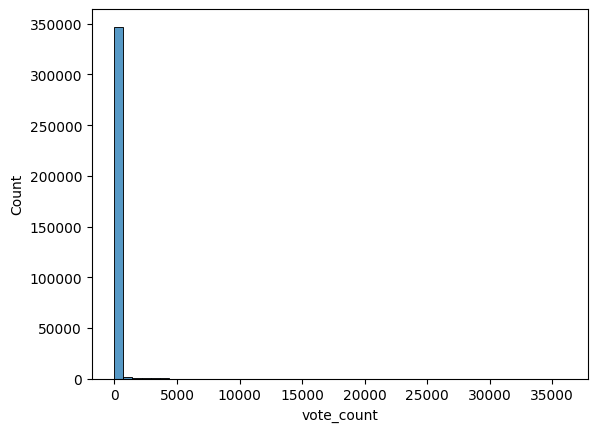

In [ ]:
sns.histplot(data=df_0, x="vote_count", bins = 50)

<Axes: xlabel='vote_count', ylabel='Count'>

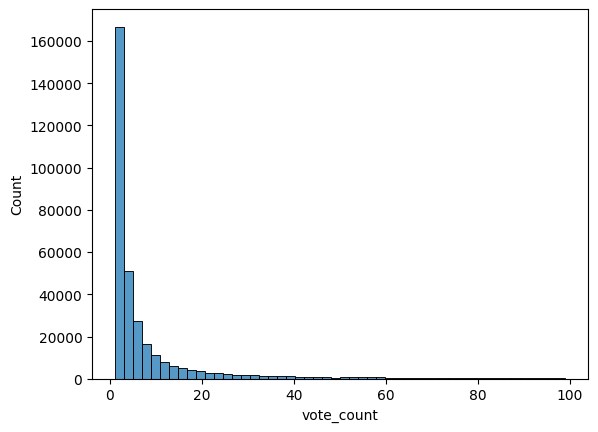

In [ ]:
sns.histplot(data=df_0[df_0['vote_count']<100], x="vote_count", bins = 50)

In [ ]:
# 90% of non-zero vote_count are < 116 votes!
# 80% of non-zero vote_count are <= 20 votes!
# 75% of non-zero vote_count are <= 9 votes!
# 50% of non-zero vote_count are <= 3 votes!
max, q99, q98, q97, q95, q90, q85, q80, q75, q60, q50 = np.percentile(df_0.loc[:,'vote_count'],[100, 99,98, 97,95, 90, 85, 80, 75, 60, 50])
display([max, q99, q98, q97, q95, q90, q85, q80, q75, q60, q50 ])

[36053.0, 1253.0, 480.0, 261.0, 117.0, 38.0, 20.0, 13.0, 9.0, 4.0, 3.0]

<Axes: xlabel='vote_average', ylabel='Count'>

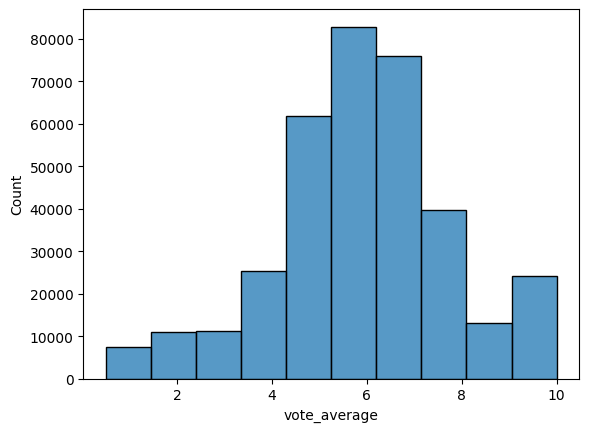

In [ ]:
sns.histplot(data=df_0, x="vote_average", bins = 10)

##### Revenue and Budget

In [ ]:
# Check: For released movies with zero revenue, what are their budgets? 96% have zero budget too
# Zero revenue or zero budget does not make sense for released movies.
raw.loc[(raw['status']=="Released") & (raw['revenue']==0.0), 'budget'].value_counts()

budget
0.0          885578
100.0          1282
1000.0         1269
10000.0        1244
5000.0         1230
              ...  
28403.0           1
4172781.0         1
2054738.0         1
1328931.0         1
7576.0            1
Name: count, Length: 4116, dtype: int64

In [ ]:
raw.loc[(raw['status']=="Released") & (raw['revenue']==0.0), 'budget'].value_counts(normalize=True)

budget
0.0          0.957822
100.0        0.001387
1000.0       0.001373
10000.0      0.001345
5000.0       0.001330
               ...   
28403.0      0.000001
4172781.0    0.000001
2054738.0    0.000001
1328931.0    0.000001
7576.0       0.000001
Name: proportion, Length: 4116, dtype: float64

In [ ]:
# Check: For released movies with zero revenue?
# Zeros in revenue or budget means missing data.
no_revenue_nrow = raw.loc[(raw['status']=="Released") & (raw['revenue']==0.0),].shape[0]
no_revenue_nrow

924575

In [ ]:
# Revenue: missingness rate:
no_revenue_nrow / nrow

0.9608579573266102

In [ ]:
# Check: For released movies with zero budget?
# Zeros in revenue or budget means missing data.
no_budget_nrow = raw.loc[(raw['status']=="Released") & (raw['budget']==0.0),].shape[0]
no_budget_nrow

893309

In [ ]:
# Budget: missingness rate:
no_budget_nrow / nrow

0.9283649904025922

In [ ]:
# how many movies have both budget and revenue >0? Not enough size for project requirement. So we can't just drop zero revenues/budgets.
raw.loc[(raw['revenue']>0) & (raw['budget']>0)].shape[0]

14422

In [ ]:
# how many movies have both budget and revenue >0? Not enough size for project requirement. So we can't just drop zero revenues/budgets.
raw.loc[raw['revenue']>0].shape[0]

22164

In [ ]:
# how many movies have budget alone > 0? Just below the required instances threshold of 50k, and likely to drop once other features are cleaned, so cannot just drop zero revenues/budgets
raw.loc[raw['budget']>0].shape[0]

54998

In [ ]:
# Negative revenue? One movie
raw.loc[raw['revenue']<0.0, ]

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,cast,director,director_of_photography,writers,producers,music_composer,imdb_rating,imdb_votes
217673,339294,Some Bears,7.0,2.0,Released,2013-05-15,-12.0,8.0,12.0,NaN,en,Some Bears,A young man slips into a world of delusion aft...,0.951,"Bears, known in the wild for their cuddliness",NaN,NaN,United States of America,English,"Liz Baker, Mike Knapik, Jersey Clark",Kiernan Mooney,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# For non-negative revenues and budgets, what's their IQR?
df_1 = raw.loc[(raw['vote_average']>0) & (raw['vote_count']>0) & (raw['revenue']>0) & (raw['budget']>0)]
df_1.describe()

,id,vote_average,vote_count,release_date,revenue,runtime,budget,popularity,imdb_rating,imdb_votes
count,1.202800e+04,12028.000000,12028.000000,11836,1.202800e+04,12028.000000,1.202800e+04,12028.000000,10949.000000,1.094900e+04
mean,2.388749e+05,6.584488,1387.589375,2002-12-09 15:09:25.731666176,5.860495e+07,101.394829,2.108018e+07,29.438366,6.348872,8.231387e+04
min,5.000000e+00,1.000000,1.000000,1911-02-04 00:00:00,1.000000e+00,0.000000,1.000000e+00,0.000000,1.100000,5.000000e+00
25%,1.158225e+04,5.900000,34.000000,1995-10-27 00:00:00,1.000000e+06,91.000000,1.209774e+06,6.695750,5.700000,4.389000e+03
50%,4.902150e+04,6.500000,301.000000,2007-12-08 00:00:00,9.500000e+06,103.000000,7.501782e+06,17.504000,6.500000,2.174500e+04
75%,3.856958e+05,7.200000,1334.000000,2016-01-14 00:00:00,4.714573e+07,119.000000,2.500000e+07,32.261000,7.100000,8.214900e+04
max,1.322822e+06,10.000000,36053.000000,2024-08-02 00:00:00,3.000000e+09,990.000000,4.600000e+08,7285.790000,10.000000,2.920811e+06
std,3.343461e+05,1.322843,2920.930305,NaN,1.488329e+08,37.789635,3.605247e+07,116.598484,1.119985,1.751815e+05


In [ ]:
# Erroneous data: Revenue < 100:
df_1[df_1['revenue']<100].shape[0]

483

array([[<Axes: title={'center': 'revenue'}>]], dtype=object)

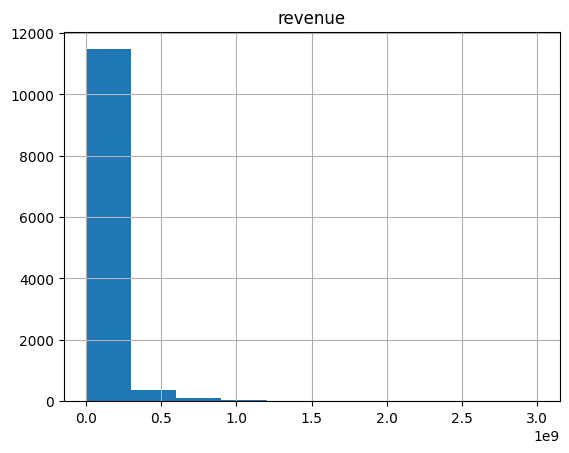

In [ ]:
# Plot revenue: extremely right skewed

df_1.hist(column = 'revenue')

In [ ]:
#Test correlation of revenue and budget information, when both are greater than 0:
Bud_rev_filtered_df = raw[(raw['revenue'] > 0) & (raw['budget'] > 0)]
correlation = Bud_rev_filtered_df['revenue'].corr(Bud_rev_filtered_df['budget'])
print("Correlation between revenue and budget, when both are greater than zero, is: ", correlation)

Correlation between revenue and budget, when both are greater than zero, is:  0.7312719769795126


In [ ]:
#Notice budget and revenue are highly correlated, even after removing the zeros - can consider removing one without losing much information
#consider dropping revenue, since there are more than twice as many budget > 0 than revenue >0
#furthermore, the number of budget > 0 is not far from our desired 50,000 rows

# For non-negative revenues and budgets, what's their IQR?
df_2 = raw.loc[(raw['vote_average']>0) & (raw['budget']>0)]

df_2.describe()

,id,vote_average,vote_count,release_date,revenue,runtime,budget,popularity,imdb_rating,imdb_votes
count,2.942100e+04,29421.000000,29421.000000,28618,2.942100e+04,29421.000000,2.942100e+04,29421.000000,24207.000000,2.420700e+04
mean,4.008461e+05,6.424659,596.284695,2007-02-21 00:01:09.438814720,2.395909e+07,81.188165,9.775086e+06,14.846997,6.043413,3.882439e+04
min,5.000000e+00,0.500000,0.000000,1878-05-07 00:00:00,-1.200000e+01,0.000000,1.000000e+00,0.000000,1.000000,5.000000e+00
25%,3.840700e+04,5.384000,1.000000,2002-11-04 06:00:00,0.000000e+00,61.000000,1.000000e+04,1.242000,5.300000,1.785000e+02
50%,2.790960e+05,6.300000,14.000000,2012-06-15 00:00:00,0.000000e+00,91.000000,7.800000e+05,3.939000,6.200000,1.873000e+03
75%,6.733090e+05,7.300000,229.000000,2019-01-16 18:00:00,3.988612e+06,107.000000,7.000000e+06,16.519000,7.000000,1.990950e+04
max,1.322920e+06,10.000000,36053.000000,2024-08-02 00:00:00,3.000000e+09,1265.000000,4.600000e+08,7285.790000,10.000000,2.920811e+06
std,4.014219e+05,1.938430,1988.287657,NaN,9.942642e+07,46.615136,2.542752e+07,76.047413,1.392285,1.245770e+05


##### Runtime

In [ ]:
# zero runtime: => these should be dropped!
raw[(raw['vote_average']>0) & (raw['vote_count']>0) & (raw['runtime']==0.0)].shape[0]

42387

In [ ]:
# runtime < 5:  Confirmed these are short movies
raw[(raw['vote_average']>0) & (raw['vote_count']>0) & (raw['runtime']>0) & (raw['runtime']<=5) &(raw['release_date'].isnull()==False)].sort_values(by = "release_date", ascending = False).head(20)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,cast,director,director_of_photography,writers,producers,music_composer,imdb_rating,imdb_votes
961166,1321857,Shadows of the Past,10.0,1.0,Released,2024-07-27,0.0,4.0,0.0,NaN,en,Shadows of the Past,"While cleaning her childhood home, a girl come...",1.960,NaN,"Fantasy, Mystery, Thriller",NaN,Portugal,English,Rita Morgado,Rita Morgado,NaN,Rita Morgado,NaN,NaN,NaN,NaN
959540,1320049,Dot,7.0,1.0,Released,2024-07-22,0.0,2.0,0.0,NaN,en,Dot,"While doing his schoolwork, a teenage boy meet...",1.400,NaN,NaN,NaN,NaN,English,Jamie Welsh,Jamie Welsh,NaN,Jamie Welsh,NaN,NaN,NaN,NaN
961744,1322495,Dear Agatha,10.0,1.0,Released,2024-07-21,0.0,3.0,0.0,NaN,pt,Querida Agatha,A man writes a suicide letter that he will lea...,1.400,NaN,"Horror, Drama, Thriller",NaN,NaN,Português,"Filipe Evangs, Dalizia Borges, Dimitra Christo...",Alehandro Duarte,MaCla Oliveira,Alehandro Duarte,D’Andrade,NaN,NaN,NaN
958200,1318571,Dr. Zombie,10.0,1.0,Released,2024-07-19,0.0,4.0,0.0,NaN,nb,Dr. Zombie,Åge spill the beans and start an apocolypse,1.960,Short moive about a zombie apocolypse,"Horror, Action",Northem Productions,Norway,NaN,"Retaj, Nikolai, Mathilde Ligodt Lindhjem, Sime...","Simen Olai Berg, Sondre Wiger",Sondre Wiger,Sondre Wiger,NaN,NaN,NaN,NaN
958149,1318518,Darby Express,10.0,1.0,Released,2024-07-18,0.0,3.0,18.0,NaN,en,Darby Express,A pair of strangers in a train clash over an u...,7.301,The train stalls. A stranger falls.,"Drama, Thriller, Horror",University of North Carolina School of the Arts,United States of America,English,"Jack Boals, Erika Sharp, Han Dorsch, Kingston ...",Eric Carson,Han Dorsch,Eric Carson,NaN,NaN,NaN,NaN
957118,1317354,Corvids,10.0,1.0,Released,2024-07-18,0.0,5.0,0.0,NaN,en,Corvids,An isolated teenager begins experiencing stran...,1.960,"A haunting train ride full of crows, nostalgia...","Mystery, Horror",NaN,United States of America,English,"Kaydence Mullin, Andrew McColl",Jason Clinard Roth,NaN,Jason Clinard Roth,Jason Clinard Roth,NaN,NaN,NaN
957909,1318250,COULD YOU DO ME A FAVOR,10.0,1.0,Released,2024-07-17,0.0,5.0,0.0,NaN,en,COULD YOU DO ME A FAVOR,"After a job goes wrong, Paul calls his friend ...",1.400,ONE UNFORGETTABLE WEEK IN GUATEMALA,Crime,NaN,United States of America,English,"Billy Bass, Devon Brossette, Isaac Bass",Isaac Bass,Ryan Gardner,Isaac Bass,NaN,NaN,NaN,NaN
958588,1318992,Forever Glup,10.0,1.0,Released,2024-07-15,0.0,4.0,0.0,NaN,en,Forever Glup,Two (relationship unlabeled) gay cowboys conte...,2.677,Two Gay Cowboys in…FOREVER GLUP,"Science Fiction, Romance, Western, Music",SOCAPA,NaN,NaN,"Eleanor Pavich, Luke Stark, Kiernan Collins",Jacob Loveday,NaN,Leilani Nguyen,NaN,NaN,NaN,NaN
957107,1317343,Smoking Kills,10.0,1.0,Released,2024-07-15,0.0,1.0,40.0,tt32916618,en,Smoking Kills,A young man sees someone smoking and decides t...,1.400,There is more than one way smoking can kill you,"Animation, Comedy",NaN,United Kingdom,NaN,Max Palmer,Max Palmer,NaN,Max Palmer,NaN,NaN,NaN,NaN
956788,1316991,Your Feet Stink,10.0,1.0,Released,2024-07-14,0.0,1.0,0.0,NaN,en,Your Feet Stink,A short film written and directed by 5-year ol...,1.960,NaN,"Horror, Comedy",NaN,NaN,NaN,"Samuel Whelan, Vincent Whelan, Ted Whelan, Cha...",Charlotte Whelan,NaN,Charlotte Whelan,Bonnie Jo Whelan,NaN,NaN,NaN


In [ ]:
# runtime > 3000:  These are real series:  documentary or animation
raw[(raw['vote_average']>0) & (raw['vote_count']>0) & (raw['runtime']>0) & (raw['runtime']>3000) &(raw['release_date'].isnull()==False)].sort_values(by = "runtime", ascending = False).head(20)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,cast,director,director_of_photography,writers,producers,music_composer,imdb_rating,imdb_votes
143582,251800,Modern Times Forever,7.0,2.0,Released,2011-03-23,0.0,14400.0,0.0,tt2659636,en,"Stora Enso Building, Helsinki","The film shows centuries of decay, compressed ...",1.782,NaN,Documentary,NaN,"Denmark, Finland, Vietnam",Dansk,NaN,"Rasmus Nielsen, Jakob Fenger, Bjornstjerne Reu...",NaN,NaN,NaN,NaN,6.3,101.0
159980,272074,Cinématon,4.3,6.0,Released,1978-12-20,0.0,12480.0,0.0,tt0242365,fr,Cinématon,Cinématon is a 156-hour long experimental film...,4.012,NaN,Documentary,"K.O.C.K. Production, Les Amis de Cinématon",France,No Language,"Gaël Badaud, Volker Schlöndorff, Derek Jarman,...",Gérard Courant,NaN,Gérard Courant,Gérard Courant,NaN,6.3,125.0
115868,197299,Beijing 2003,1.5,2.0,Released,2004-01-01,0.0,9000.0,0.0,tt2355497,en,Beijing 2003,Beijing 2003 is a video about the city that th...,0.990,NaN,Documentary,Ai Weiwei Studio,China,普通话,NaN,Ai Weiwei,NaN,NaN,Ai Weiwei,NaN,7.2,32.0
79182,120474,The Cure For Insomnia,2.7,3.0,Released,1987-01-31,0.0,5220.0,0.0,tt0284020,en,The Cure For Insomnia,Not really following any standard plot structu...,1.580,NaN,Documentary,NaN,United States of America,English,"J.T.4, L.D. Groban, Cosmic Lightning",John Henry Timmis IV,NaN,L.D. Groban,NaN,NaN,4.8,422.0
241416,368247,#ALLMYMOVIES,7.5,6.0,Released,2015-11-12,0.0,4320.0,0.0,NaN,en,#ALLMYMOVIES,Shia LaBeouf watches all his movies in reverse...,0.833,NaN,Documentary,newhive,United States of America,NaN,Shia LaBeouf,"Nastja Säde Rönkkö, Shia LaBeouf, Luke Turner",NaN,NaN,NaN,NaN,NaN,NaN
120356,206026,Giant 600 Cartoon Collection,6.0,1.0,Released,2008-07-22,0.0,3720.0,0.0,NaN,en,Giant 600 Cartoon Collection,Mill Creek Entertainment introduces the Giant ...,0.600,NaN,Animation,NaN,NaN,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
raw[raw['runtime']>0].describe()

,id,vote_average,vote_count,release_date,revenue,runtime,budget,popularity,imdb_rating,imdb_votes
count,7.370380e+05,737038.000000,737038.000000,689375,7.370380e+05,737038.000000,7.370380e+05,737038.000000,373146.000000,3.731460e+05
mean,6.520183e+05,2.499978,31.271787,1999-06-17 10:09:41.462338688,1.045685e+06,60.439224,3.980119e+05,2.503781,6.250824,3.147080e+03
min,2.000000e+00,0.000000,0.000000,1865-01-01 00:00:00,-1.200000e+01,1.000000,0.000000e+00,0.000000,1.000000,5.000000e+00
25%,3.394245e+05,0.000000,0.000000,1987-09-04 00:00:00,0.000000e+00,15.000000,0.000000e+00,0.600000,5.500000,2.200000e+01
50%,6.360785e+05,0.000000,0.000000,2010-07-13 00:00:00,0.000000e+00,61.000000,0.000000e+00,0.939000,6.400000,7.100000e+01
75%,9.774528e+05,5.667000,2.000000,2019-02-07 00:00:00,0.000000e+00,91.000000,0.000000e+00,1.718000,7.100000,3.230000e+02
max,1.323046e+06,10.000000,36053.000000,2044-04-27 00:00:00,3.000000e+09,14400.000000,4.600000e+08,7285.790000,10.000000,2.920811e+06
std,3.805429e+05,3.171153,418.197066,NaN,2.086784e+07,60.078539,5.478587e+06,16.812957,1.290824,3.330867e+04


##### Popularity

array([[<Axes: title={'center': 'popularity'}>]], dtype=object)

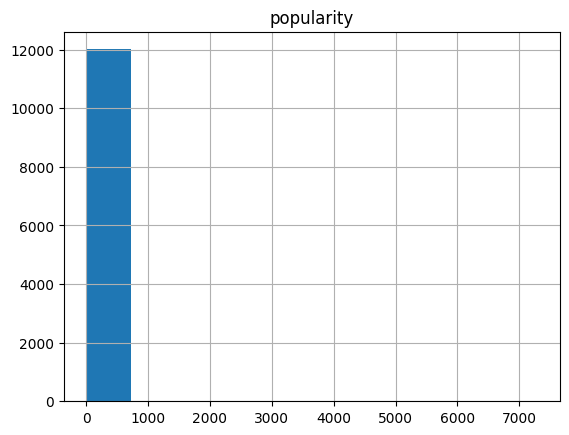

In [ ]:
# Plot popularity: extremely right skewed

df_1.hist(column = 'popularity')

In [ ]:
# Question: how is popularity created? Why half of data have <1.4, some have 5741?
max, q99, q98, q97, q95, q90, q85, q80, q75, q60, q50 = np.percentile(df_0.loc[:,'popularity'],[100, 99,98, 97,95, 90, 85, 80, 75, 60, 50])
display([max, q99, q98, q97, q95, q90, q85, q80, q75, q60, q50 ])

[7285.79,
 39.46507999999996,
 26.263,
 20.698,
 14.834700000000012,
 8.509,
 5.748,
 4.242,
 3.295,
 1.956,
 1.504]

### **1.2.3** Clean data: filtering and selecting


####1.2.3a Reduce raw df instances and/or fields:
* Exclude null titles
* include only released movies
* include only positive instances of
 * vote counts,
 * vote_average, and
 * runtime
* Exclude instances with null values for:
 * original_language
 * genres
 * production_companies
 * production_countris
 * cast
 * director
 * writers
* Drop revenue field due to missingness
* Drop the following due to irrelevance or too many categories
 * original_title
 * spoken_languages
 * director_of_photography
 * music_composer
 * imdb_id
 * producers
 * popularity



In [ ]:
# Drop: no title, no release_date, zero vote_count, zero vote_average, zero runtime
# filter to Released movies
# Exclude null values in the variables we want to keep
df = raw.loc[(raw['title'].isnull()==False) &
         (raw['status']=='Released') &
          (raw['release_date'].isnull()==False) &
           (raw['vote_count']>0.0) &
            (raw['vote_average']>0.0) &
              (raw['runtime']>0.0) &
              (raw['original_language'].isnull()==False) & (raw['genres'].isnull()==False) & (raw['production_companies'].isnull()==False)&
            (raw['production_countries'].isnull()==False) & (raw['cast'].isnull()==False) & (raw['director'].isnull()==False) & (raw["writers"].isnull()==False)
             ]

# Drop columns due to high missingness:
df = df.drop(["revenue"], axis = 1)

# Drop columns due to irrelevance/too many categories:
df = df.drop(["original_title", "spoken_languages", "director_of_photography","music_composer", "imdb_id", "producers", "popularity"], axis = 1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161005 entries, 0 to 962095
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    161005 non-null  int64         
 1   title                 161005 non-null  object        
 2   vote_average          161005 non-null  float64       
 3   vote_count            161005 non-null  float64       
 4   status                161005 non-null  object        
 5   release_date          161005 non-null  datetime64[ns]
 6   runtime               161005 non-null  float64       
 7   budget                161005 non-null  float64       
 8   original_language     161005 non-null  object        
 9   overview              157668 non-null  object        
 10  tagline               57086 non-null   object        
 11  genres                161005 non-null  object        
 12  production_companies  161005 non-null  object        
 13  prod

#### **1.2.3b Impute Values or Drop Budget**

##### Intuitively, budget could provide an important contribution to the prediction of vote_average, and so we should confirm imputing data does not improve its contribution to explaining vote_average.

##### *Now that we have reduced the dataset to relevant fields and values for key fields, we can determine whether we can keep the budget column or should drop it*
* Calculate correlation between budget and vote_average
* Calculate Average Budget by Release Decade
* Impute Average Budget where data is missing
* Check correlation between budget and vote_average again
* Check models with budget data imputed using release decade method
* If no change, then drop budget field

In [ ]:
# Correlation between budget and future target variable, vote_average

budg_corr = df['budget'].corr(df['vote_average'])
print(budg_corr)



0.05958168717880926


In [ ]:
#Calculate average budget
positive_budgets = df['budget'][df['budget'] > 0]
avg_budget = positive_budgets.mean()
print(avg_budget)

14053483.159279225


In [ ]:
budget_df = df[df['budget'] > 0]
print(budget_df['budget'].describe())

count    2.003400e+04
mean     1.405348e+07
std      2.974879e+07
min      1.000000e+00
25%      3.000000e+05
50%      3.000000e+06
75%      1.400000e+07
max      4.600000e+08
Name: budget, dtype: float64


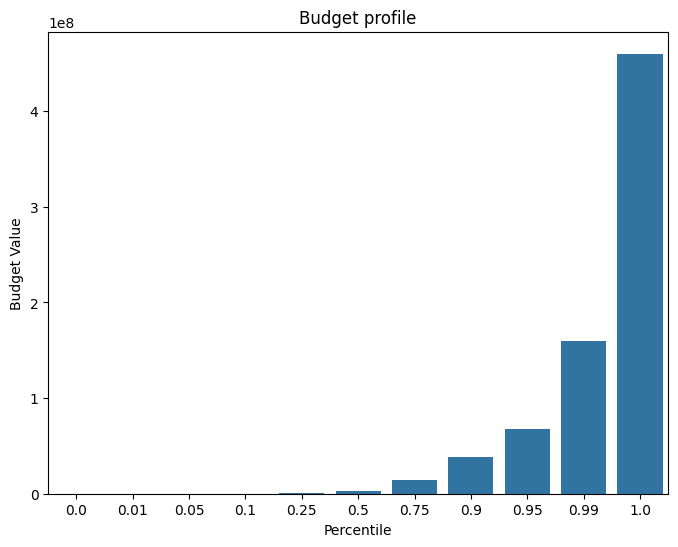

In [ ]:
# Plotting percentiles in barplot
percentiles = budget_df['budget'].quantile([0, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 1.0]).reset_index()
percentiles.columns = ['Percentile', 'Budget_Value']

#add function to show budget in an easy to interpret manner
def millions(x, pos):
    return f'${int(x):,}'

plt.figure(figsize = (8,6))
sns.barplot(x = 'Percentile', y = 'Budget_Value', data = percentiles)

plt.title('Budget profile')
plt.xlabel('Percentile')
plt.ylabel('Budget Value')
plt.show()

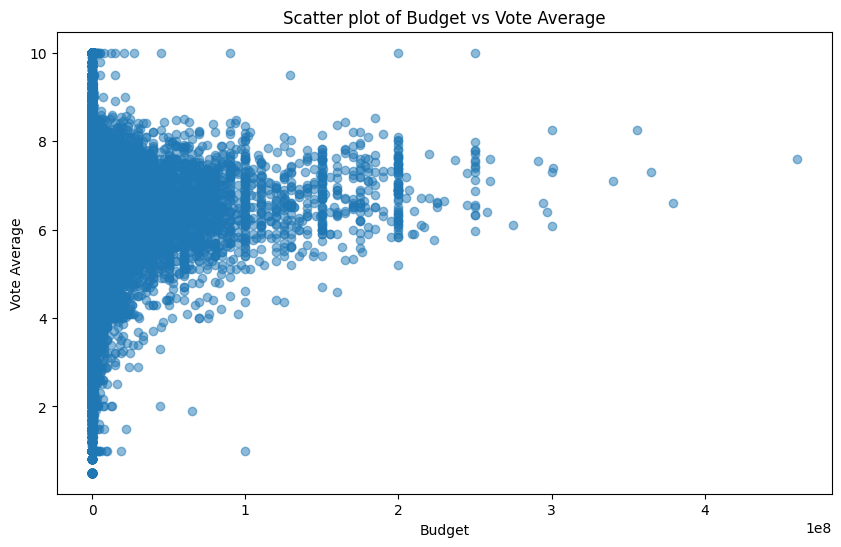

In [ ]:
# Scatterplot of budget vs vote_average
plt.figure(figsize = (10,6))

plt.scatter(df['budget'], df['vote_average'], alpha = 0.5)
plt.title('Scatter plot of Budget vs Vote Average')
plt.xlabel('Budget')
plt.ylabel('Vote Average')
plt.show()

In [ ]:
#create release_year_decade df to get average budgets by decade
df['release_year'] = pd.DatetimeIndex(df['release_date']).year
df['release_year_decade'] = df['release_year'].apply(lambda x: str(int(x / 10) * 10) + 's')

decades_budget_df = df[['release_year_decade', 'budget']]
filtered_decades_budget_df = decades_budget_df[decades_budget_df['budget']> 0]

average_budget_by_decade = filtered_decades_budget_df.groupby('release_year_decade')['budget'].mean().reset_index()

print(average_budget_by_decade)

   release_year_decade        budget
0                1900s  2.528667e+03
1                1910s  1.578581e+05
2                1920s  6.681758e+05
3                1930s  7.510862e+05
4                1940s  1.704912e+06
5                1950s  1.780252e+06
6                1960s  3.285206e+06
7                1970s  3.529874e+06
8                1980s  9.287591e+06
9                1990s  1.981249e+07
10               2000s  1.856907e+07
11               2010s  1.443428e+07
12               2020s  1.274934e+07


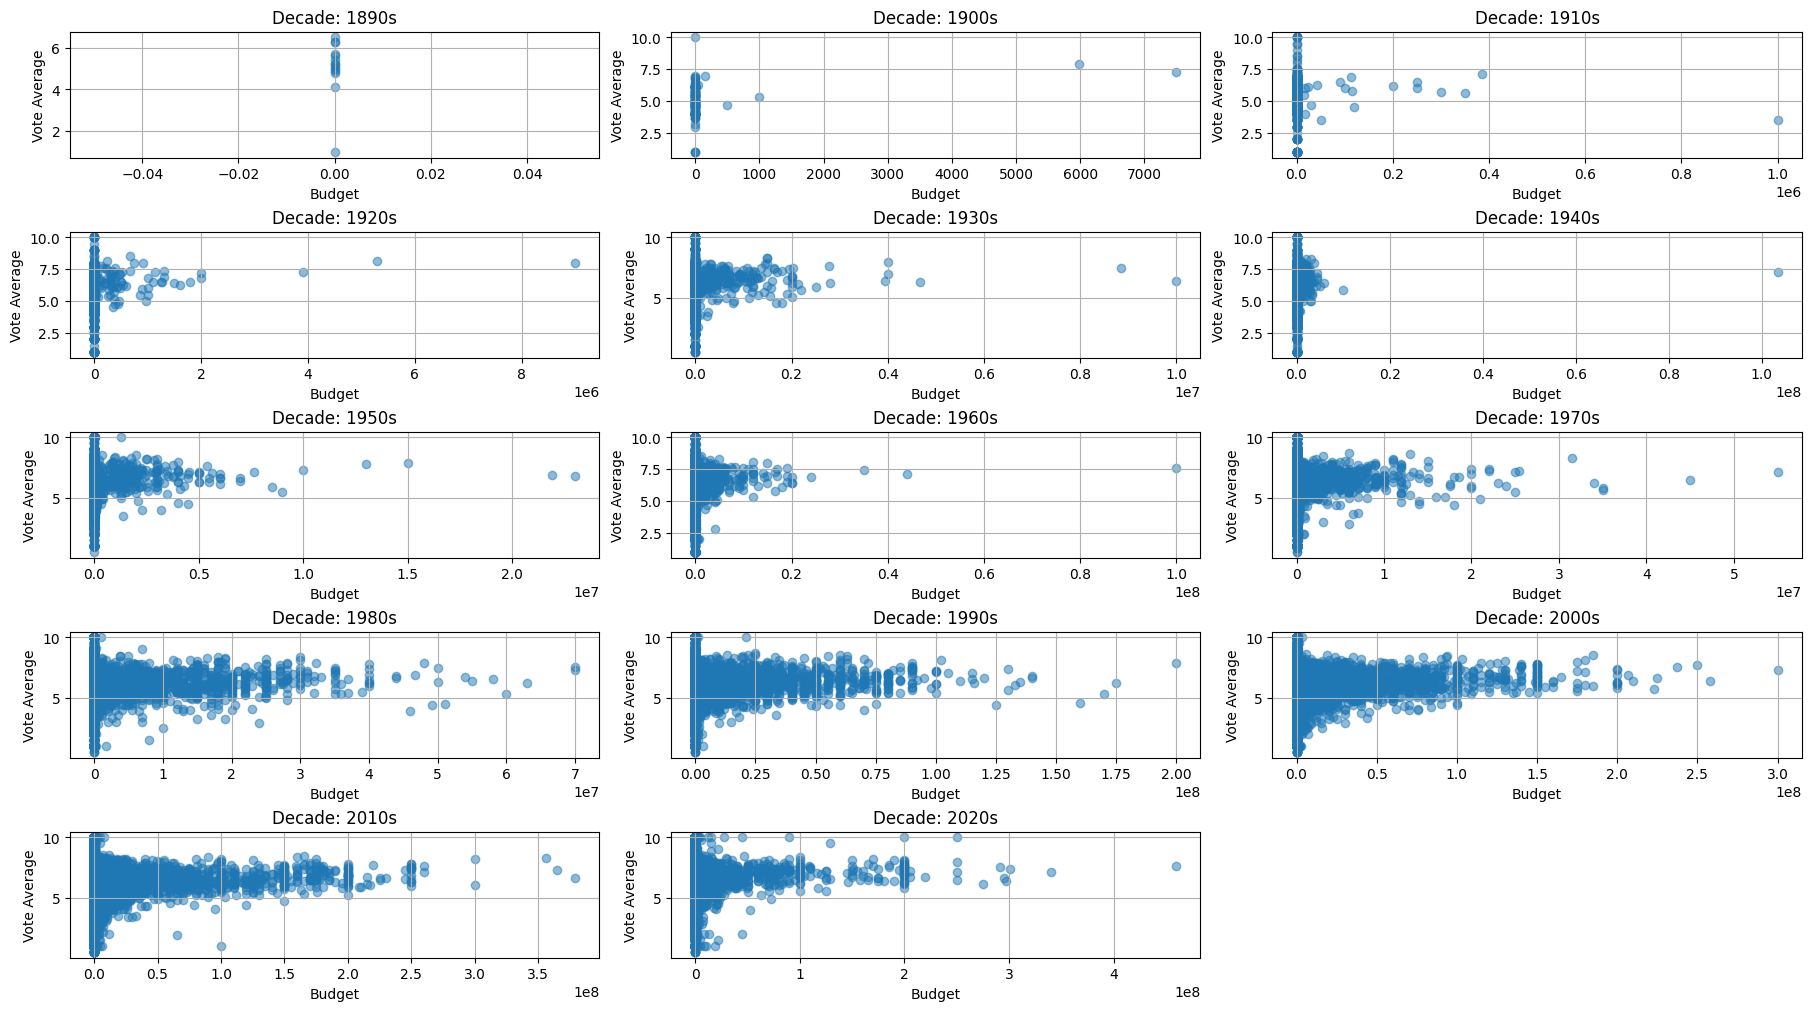

In [ ]:
# Scatterplots of relationships before imputing average budget by decade values

decades = df['release_year_decade'].unique()
decades.sort()

# Create a figure with subplots - adjust the size and number of rows/columns depending on the number of decades
fig, axes = plt.subplots(nrows = int(len(decades) / 3) + (len(decades) % 3 > 0), ncols = 3, figsize = (18, 10), constrained_layout = True)
axes = axes.flatten()

# Loop over each decade and create a scatterplot
for i, decade in enumerate(decades):
    # Filter the Dataframe for the specific decade
    subset = df[df['release_year_decade'] == decade]

    # create a scatterplot for that decade
    axes[i].scatter(subset['budget'], subset['vote_average'], alpha = 0.5)
    axes[i].set_title(f'Decade: {decade}')
    axes[i].set_xlabel('Budget')
    axes[i].set_ylabel('Vote Average')
    axes[i].grid(True)

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.show()

In [ ]:

# create a dictionary of average budgets by decade to use for imputing values
budget_map = dict(zip(average_budget_by_decade['release_year_decade'], average_budget_by_decade['budget']))
print(budget_map)

{'1900s': 2528.6666666666665, '1910s': 157858.13636363635, '1920s': 668175.8068181818, '1930s': 751086.2336065574, '1940s': 1704911.8300395256, '1950s': 1780251.7222222222, '1960s': 3285206.091116173, '1970s': 3529874.2839838495, '1980s': 9287590.545041636, '1990s': 19812493.134092033, '2000s': 18569068.49866191, '2010s': 14434283.507565144, '2020s': 12749341.976618096}


* Check unique values from release year decade in df to ensure complete mapping from decades in map to df

In [ ]:
unique_decades = df['release_year_decade'].unique()
print(unique_decades)

['1980s' '1990s' '1970s' '2000s' '1940s' '1920s' '1960s' '1930s' '1950s'
 '2010s' '1910s' '1900s' '2020s' '1890s']


* Since 1890s are missing from the budget_map likely due to 0 or NaN values, we need to add it

In [ ]:
# print 1890's to see why it was missing:
df_1890 = df[df['release_year_decade'] == '1890s']
df_1890

,id,title,vote_average,vote_count,status,release_date,runtime,budget,original_language,overview,tagline,genres,production_companies,production_countries,cast,director,writers,imdb_rating,imdb_votes,release_year,release_year_decade
65617,94570,The Kiss,5.200,124.0,Released,1896-04-01,1.0,0.0,xx,"They get ready to kiss, begin to kiss, and kis...",NaN,"Drama, Romance",Edison Studios,United States of America,"May Irwin, John C. Rice",William Heise,John D. McNally,5.8,3690.0,1896,1890s
70491,104460,Playing Cards,4.800,55.0,Released,1896-01-01,1.0,0.0,fr,Three friends are playing cards in a beer gard...,Early Méliès short made up of footage of he an...,"Documentary, Comedy","Georges Méliès, Star Film Company",France,"Georges Méliès, Georgette Méliès, Gaston Méliès",Georges Méliès,Georges Méliès,5.1,1149.0,1896,1890s
70493,104462,A Terrible Night,5.103,78.0,Released,1896-01-01,1.0,0.0,fr,"A man tries to get a good night's sleep, but i...",NaN,"Comedy, Horror",Star Film Company,France,Georges Méliès,Georges Méliès,Georges Méliès,5.7,1547.0,1896,1890s
70499,104471,The Haunted Castle,5.600,59.0,Released,1897-01-01,1.0,0.0,fr,A man has an encounter with several spooky app...,NaN,Horror,Star-Film,France,Georges Méliès,Georges Méliès,Georges Méliès,6.3,1453.0,1897,1890s
70504,104476,The Bewitched Inn,6.300,61.0,Released,1897-01-01,2.0,0.0,fr,A weary traveler stops at an inn along the way...,NaN,Fantasy,Star Film,France,Georges Méliès,Georges Méliès,Georges Méliès,6.4,1240.0,1897,1890s
70629,104706,The Pillar of Fire,5.700,47.0,Released,1899-01-01,1.0,0.0,fr,A devil wearing bat-like wings and brandishing...,NaN,Fantasy,Star-Film,France,"Jehanne d'Alcy, Georges Méliès",Georges Méliès,"H. Rider Haggard, Georges Méliès",6.3,1018.0,1899,1890s
70913,105166,The X-Ray Fiend,5.400,57.0,Released,1897-10-01,1.0,0.0,en,A romantic couple are transformed into skeleto...,NaN,"Comedy, Horror",George Albert Smith Films,United Kingdom,"Tom Green, Laura Bayley",George Albert Smith,George Albert Smith,6.0,1071.0,1897,1890s
75660,114108,Cinderella,6.300,99.0,Released,1899-10-01,6.0,0.0,fr,A fairy godmother magically turns Cinderella's...,NaN,"Drama, Family, Fantasy, Romance","Star-Film, Georges Méliès",France,"Georges Méliès, Mlle Barral, Jehanne d'Alcy, C...",Georges Méliès,Charles Perrault,6.5,1839.0,1899,1890s
85473,133063,The Haunted Castle,6.500,179.0,Released,1896-12-24,3.0,0.0,fr,"In a medieval castle, a dark magician thought ...",NaN,"Fantasy, Horror","Georges Méliès, Star Film",France,"Georges Méliès, Jehanne d'Alcy",Georges Méliès,Georges Méliès,6.7,4048.0,1896,1890s
91843,146564,Exit of Rip and the Dwarf,4.100,28.0,Released,1896-09-30,1.0,0.0,en,A series of short black and white films from d...,NaN,"Western, Drama",American Mutoscope & Biograph,United States of America,Joseph Jefferson,William K.L. Dickson,Washington Irving,4.5,562.0,1896,1890s


In [ ]:
df_1890.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 65617 to 420802
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    14 non-null     int64         
 1   title                 14 non-null     object        
 2   vote_average          14 non-null     float64       
 3   vote_count            14 non-null     float64       
 4   status                14 non-null     object        
 5   release_date          14 non-null     datetime64[ns]
 6   runtime               14 non-null     float64       
 7   budget                14 non-null     float64       
 8   original_language     14 non-null     object        
 9   overview              14 non-null     object        
 10  tagline               1 non-null      object        
 11  genres                14 non-null     object        
 12  production_companies  14 non-null     object        
 13  production_countrie

In [ ]:
# Since I am missing the 1890s, and there are just 15 of them, I'll set them equal to the average from the 1900s
budget_map['1890s'] = budget_map['1900s']
print(budget_map)


{'1900s': 2528.6666666666665, '1910s': 157858.13636363635, '1920s': 668175.8068181818, '1930s': 751086.2336065574, '1940s': 1704911.8300395256, '1950s': 1780251.7222222222, '1960s': 3285206.091116173, '1970s': 3529874.2839838495, '1980s': 9287590.545041636, '1990s': 19812493.134092033, '2000s': 18569068.49866191, '2010s': 14434283.507565144, '2020s': 12749341.976618096, '1890s': 2528.6666666666665}


##### Apply average budget by decade to the missing budget values
* its clear that average budget generally increases over time, likely due to inflation
* it's also likely that the oldest movies may not be as often reviewed, and so applying a decade-specific average for imputed values may be appropriate
* otherwise, we may be placing more 'budget' weight on older movies than is reasonable


In [ ]:
# Impute zero budgets using the map

# then replace 0's with the appropriate avg budget from the instance's release year decade
df.loc[df['budget'] == 0, 'budget'] = df['release_year_decade'].map(budget_map)
# drop release_year since it's no longer needed
df = df.drop(['release_year'], axis = 1)
#df = df.drop(['release_year_decade'], axis = 1)
df

,id,title,vote_average,vote_count,status,release_date,runtime,budget,original_language,overview,tagline,genres,production_companies,production_countries,cast,director,writers,imdb_rating,imdb_votes,release_year_decade
0,2,Ariel,7.107,326.0,Released,1988-10-21,73.0,9.287591e+06,fi,After the coal mine he works at closes and his...,NaN,"Drama, Comedy, Romance, Crime",Villealfa Filmproductions,Finland,"Eino Kuusela, Olli Varja, Kauko Laalo, Hannu K...",Aki Kaurismäki,Aki Kaurismäki,7.4,8545.0,1980s
1,3,Shadows in Paradise,7.300,368.0,Released,1986-10-17,74.0,9.287591e+06,fi,"Nikander, a rubbish collector and would-be ent...",NaN,"Comedy, Drama, Romance",Villealfa Filmproductions,Finland,"Ari Korhonen, Pekka Laiho, Jukka-Pekka Palo, K...",Aki Kaurismäki,Aki Kaurismäki,7.5,7286.0,1980s
2,5,Four Rooms,5.800,2578.0,Released,1995-12-09,98.0,4.000000e+06,en,It's Ted the Bellhop's first night on the job....,Twelve outrageous guests. Four scandalous requ...,Comedy,"Miramax, A Band Apart",United States of America,"Kimberly Blair, Sammi Davis, Paul Skemp, Bruce...","Alexandre Rockwell, Quentin Tarantino, Allison...","Alexandre Rockwell, Quentin Tarantino, Allison...",6.7,111710.0,1990s
3,6,Judgment Night,6.500,326.0,Released,1993-10-15,109.0,2.100000e+07,en,"Four young friends, while taking a shortcut en...",Don't move. Don't whisper. Don't even breathe.,"Action, Crime, Thriller","Largo Entertainment, JVC, Universal Pictures",United States of America,"Doug Wert, Michael DeLorenzo, Everlast, Christ...",Stephen Hopkins,"Jere Cunningham, Lewis Colick",6.6,19024.0,1990s
6,11,Star Wars,8.200,20262.0,Released,1977-05-25,121.0,1.100000e+07,en,Princess Leia is captured and held hostage by ...,"A long time ago in a galaxy far, far away...","Adventure, Action, Science Fiction","Lucasfilm Ltd., 20th Century Fox",United States of America,"Colin Higgins, Lorne Peterson, Graham Ashley, ...",George Lucas,George Lucas,8.6,1463022.0,1970s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961331,1322037,Sharp Instinct,10.000,1.0,Released,2023-03-23,40.0,1.280000e+02,en,"There's a killer on the loose, and there's not...",There's a killer on the loose,"Crime, Comedy",Clydeside Studios,United Kingdom,"Billy Burke, Jackie Seggie, Paul Burke, John S...",Callum McLelland,Callum McLelland,NaN,NaN,2020s
961417,1322132,Stuck,10.000,1.0,Released,2024-07-28,6.0,3.500000e+02,en,A man gets stuck in his lover's apartment and ...,NaN,"Thriller, Comedy","McSweeney Films, Film Nerd Productions",Ireland,"Marco Lucchese, Lily Bannon, David McSweeney","Shane Kelleher, Graham McSweeney","Shane Kelleher, Graham McSweeney, David McSwee...",NaN,NaN,2020s
961740,1322491,El Lienzo,10.000,1.0,Released,2024-06-15,31.0,3.000000e+02,es,This story follows Mauricio in his dilema betw...,NaN,"Drama, Thriller",Film Fest Studios,Mexico,"Alfonso García Y., Sihan Charruf, Nicolás Mací...",Carlos A. Cano Bates,"Carlos A. Cano Bates, JuanPa Gonzalez, Flavio ...",NaN,NaN,2020s
961828,1322592,Friends playing pool,10.000,1.0,Released,2024-07-29,7.0,1.274934e+07,en,2 Friends are playing pool but something feels...,Makes no sense,"Drama, Mystery",The Cuckoo Birds Production,Australia,T and B,Lucas Pascuzzi,Lucas Pascuzzi,NaN,NaN,2020s


##### **Since it does look like there is a slight upward trend, let's check by decade**
* What we find is that the zeros from before imputing values are shifted to the average for each decade
* This does not appear to impact the trend that regardless of budget or decade, vote average appears not to be described by budget.

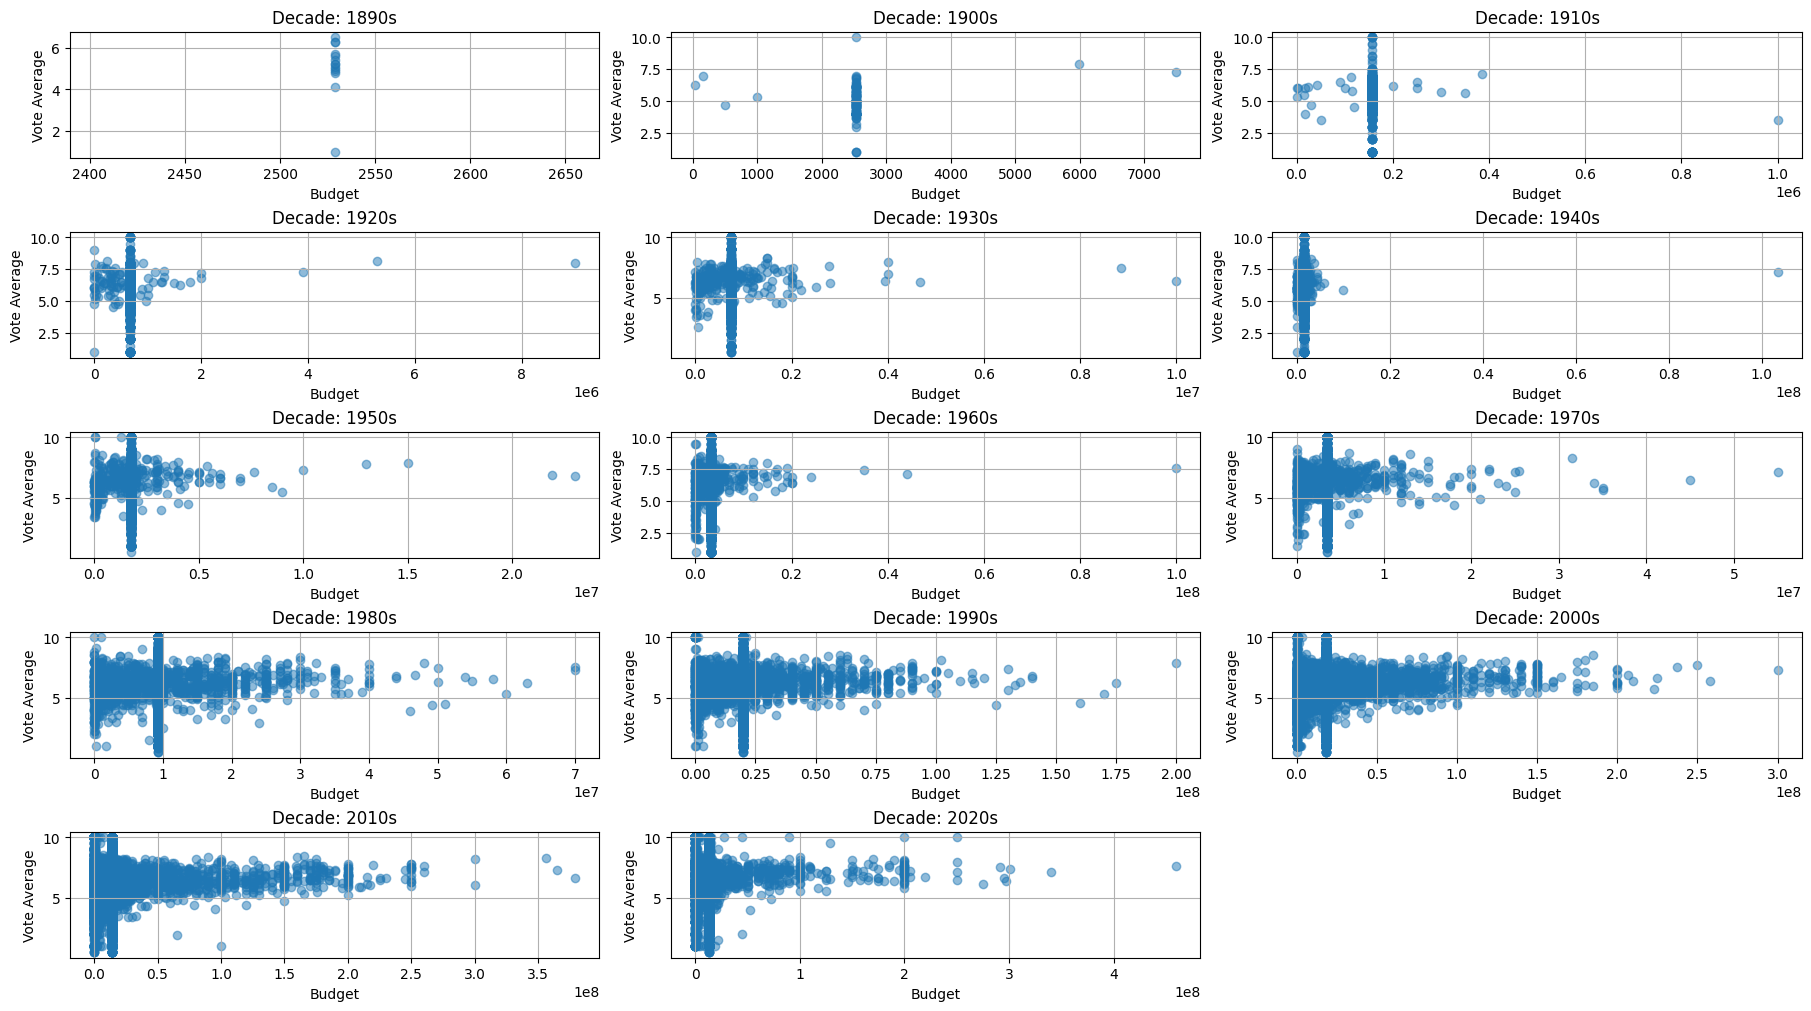

In [ ]:
decades = df['release_year_decade'].unique()
decades.sort()

# Create a figure with subplots - adjust the size and number of rows/columns depending on the number of decades
fig, axes = plt.subplots(nrows = int(len(decades) / 3) + (len(decades) % 3 > 0), ncols = 3, figsize = (18, 10), constrained_layout = True)
axes = axes.flatten()

# Loop over each decade and create a scatterplot
for i, decade in enumerate(decades):
    # Filter the Dataframe for the specific decade
    subset = df[df['release_year_decade'] == decade]

    # create a scatterplot for that decade
    axes[i].scatter(subset['budget'], subset['vote_average'], alpha = 0.5)
    axes[i].set_title(f'Decade: {decade}')
    axes[i].set_xlabel('Budget')
    axes[i].set_ylabel('Vote Average')
    axes[i].grid(True)

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.show()


In [ ]:
# Calculate new budget correlation with vote_average
budg_corr = df['budget'].corr(df['vote_average'])
print(budg_corr)

0.04029590904318546


##### **Since correlation actually reduced after imputing values and a visual look at the relationship between budget and vote_average, even by decade, shows no noticable relationship, we should drop this field.

In [ ]:
# Drop columns due to high missingness:
df = df.drop(["budget"], axis = 1)

In [ ]:
df.describe()

,id,vote_average,vote_count,release_date,runtime,imdb_rating,imdb_votes
count,1.610050e+05,161005.000000,161005.000000,161005,161005.000000,152341.000000,1.523410e+05
mean,3.499260e+05,5.863695,138.104475,1994-03-15 15:19:17.978944768,87.503910,6.057155,7.455238e+03
min,2.000000e+00,0.500000,1.000000,1894-10-08 00:00:00,1.000000,1.000000,5.000000e+00
25%,8.664100e+04,5.000000,2.000000,1976-01-07 00:00:00,78.000000,5.400000,8.500000e+01
50%,2.765280e+05,6.000000,7.000000,2004-01-01 00:00:00,90.000000,6.200000,2.980000e+02
75%,5.153330e+05,6.800000,26.000000,2016-07-26 00:00:00,103.000000,6.900000,1.283000e+03
max,1.322901e+06,10.000000,36053.000000,2024-08-02 00:00:00,12480.000000,10.000000,2.920811e+06
std,3.059401e+05,1.549883,886.285358,NaN,47.148244,1.172546,5.180173e+04


##### Save out cleaned dataset to Google Drive

In [ ]:
# Save cleaned dataset to Google drive
#df.to_csv('/content/drive/My Drive/movies_cleaned1.csv', index=False)

### **1.2.4** Visualizations

### Trends of Movie Releases


#### (a) Number of Movies by Release Decade




In [ ]:
df['release_year'] = pd.DatetimeIndex(df['release_date']).year
release_df = df[['release_year', 'id']]
release_df = release_df.applymap(lambda release_df: str(int(release_df/ 10) * 10) + 's')

<ipython-input-76-40c5e9cb0575>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  release_df = release_df.applymap(lambda release_df: str(int(release_df/ 10) * 10) + 's')


In [ ]:
release_decade_df = release_df.groupby('release_year').count().reset_index().rename(columns= {'id':'Count'})
release_decade_df

,release_year,Count
0,1890s,14
1,1900s,120
2,1910s,1132
3,1920s,1801
4,1930s,5569
5,1940s,6228
6,1950s,8072
7,1960s,9826
8,1970s,12113
9,1980s,13471


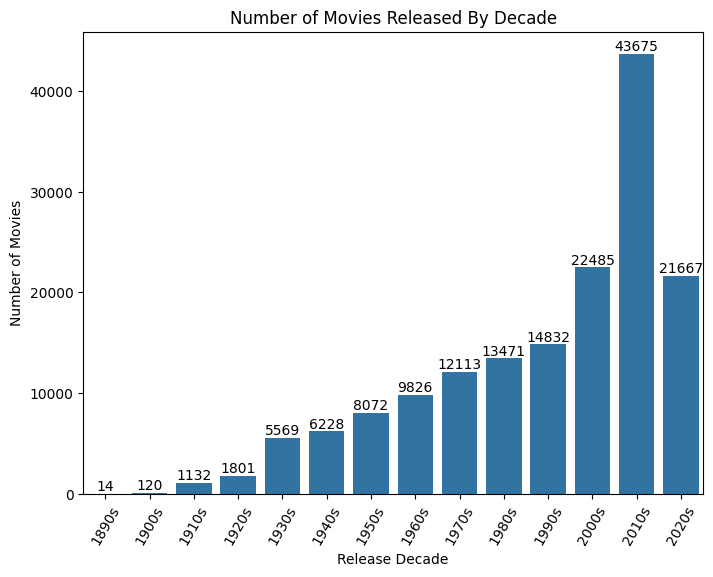

In [ ]:

fig, ax = plt.subplots(figsize = (8,6))
fig =  sns.barplot(x="release_year", y = "Count",
             data=release_decade_df.sort_values(by="release_year"))
for i in fig.containers:
    fig.bar_label(i,)
plt.xlabel("Release Decade")
plt.ylabel("Number of Movies")
plt.title("Number of Movies Released By Decade")
plt.xticks(rotation=60)
plt.show()

#### (b) Number of movies of each genre by release decade

In [ ]:
df_genre = df.loc[df['genres'].isin(['Drama', 'Comedy', 'Documentary', 'Horror', 'Western', 'Animation', 'Thriller', 'Action', 'Crime', 'Drama, Romance']), ("id", "genres", "release_date", "vote_average")]
df_genre['release_year'] = pd.DatetimeIndex(df_genre['release_date']).year
df_genre['release_year_decade'] = df_genre['release_year'].apply(lambda x: str(int(x / 10) * 10) + 's')
df_genre = df_genre[['genres', 'release_year_decade', 'id']]
df_genre_plot = df_genre.groupby(by =['genres', 'release_year_decade']).count().reset_index().rename(columns = {'id': 'Count'})

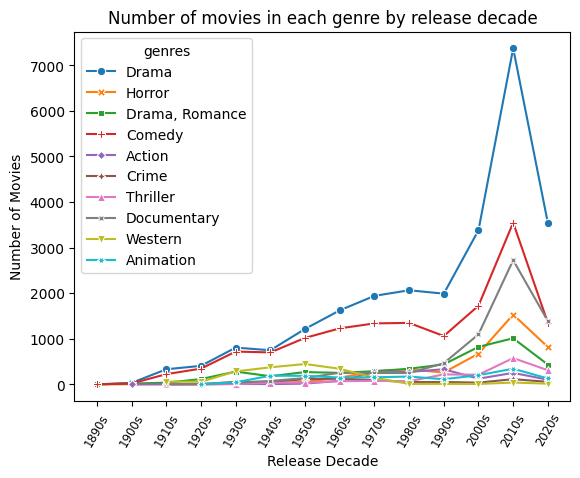

In [ ]:
p1 = sns.lineplot(x="release_year_decade", y="Count",
             hue="genres", style = "genres", markers = True,dashes = False,
             data=df_genre_plot.sort_values(by="release_year_decade"))
plt.xlabel("Release Decade")
plt.ylabel("Number of Movies")
plt.title("Number of movies in each genre by release decade")
#plt.legend()
plt.xticks(rotation=60, fontsize = 'small')
plt.show()


#### (c) Number of Movies by Release Month




In [ ]:
df['release_month'] = pd.DatetimeIndex(df['release_date']).month
release_df = df[['release_month']]
release_month_plot = release_df.reset_index().groupby('release_month').count().reset_index().rename(columns= {'index':'Count'})

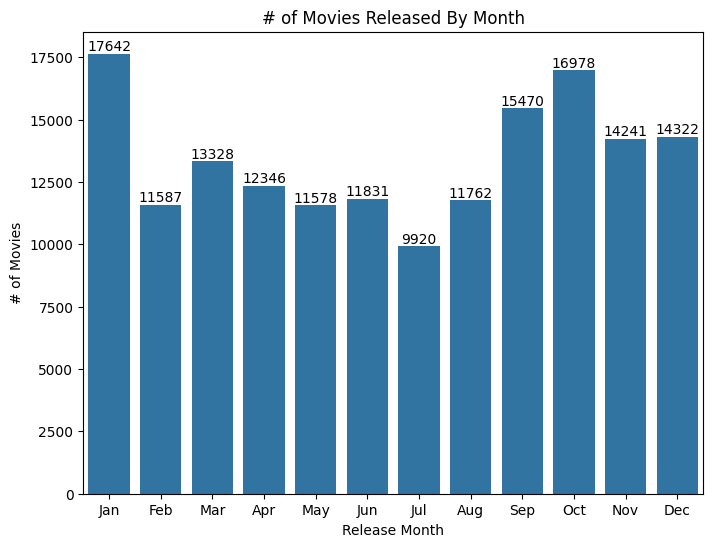

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
fig =  sns.barplot(x="release_month", y = "Count",
             data=release_month_plot.sort_values(by="release_month"))
for i in fig.containers:
    fig.bar_label(i,)
plt.xlabel("Release Month")
plt.ylabel("# of Movies")
plt.title("# of Movies Released By Month")
fig.set_xticks(range(0,12), labels=('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct' , 'Nov', 'Dec'))
plt.show()

### Trends of Movie Ratings


#### (d) Average Ratings by Release Decade



In [ ]:
df['release_year'] = pd.DatetimeIndex(df['release_date']).year
df['release_year_decade'] = df['release_year'].apply(lambda x: str(int(x / 10) * 10) + 's')
df_c = df[['release_year_decade', 'vote_average']]
#df_c.groupby('release_year_decade').mean('vote_average')

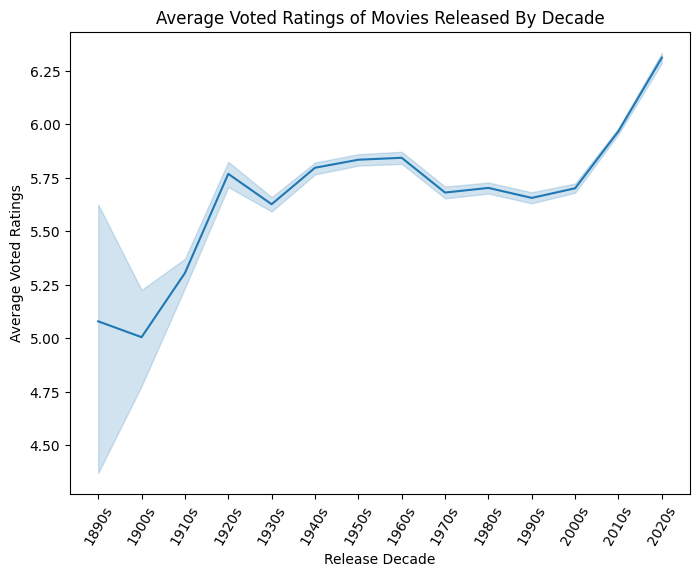

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
fig =  sns.lineplot(x="release_year_decade", y = "vote_average",
             data=df_c.sort_values(by="release_year_decade"), markers = True, dashes = False)
plt.xlabel("Release Decade")
plt.ylabel("Average Voted Ratings")
plt.title("Average Voted Ratings of Movies Released By Decade")
plt.xticks(rotation=60)
plt.show()


#### (e) Average Ratings by Genres




In [ ]:
df['genres'].value_counts().head(30)

genres
Drama                     25460
Comedy                    14634
Documentary                6694
Drama, Romance             4478
Horror                     4157
Comedy, Drama              3992
Comedy, Romance            2792
Drama, Comedy              2372
Western                    1805
Romance, Drama             1715
Animation                  1695
Thriller                   1626
Drama, Thriller            1541
Drama, TV Movie            1485
Action                     1468
Crime, Drama               1462
Horror, Thriller           1426
Drama, History             1233
Drama, Crime               1165
Comedy, Drama, Romance     1076
Romance, Comedy            1073
Action, Drama               861
Drama, War                  826
Animation, Comedy           781
Crime                       767
Action, Thriller            751
Romance                     708
Thriller, Drama             700
Drama, Family               691
Comedy, Horror              676
Name: count, dtype: int64

In [ ]:
df_d = df.loc[df['genres'].isin(['Drama', 'Comedy', 'Documentary', 'Horror', 'Western', 'Animation', 'Thriller', 'Action', 'Crime', 'Drama, Romance']), ("genres", "vote_average")]
df_d_plot = df_d.groupby(['genres'])['vote_average'].mean().reset_index()

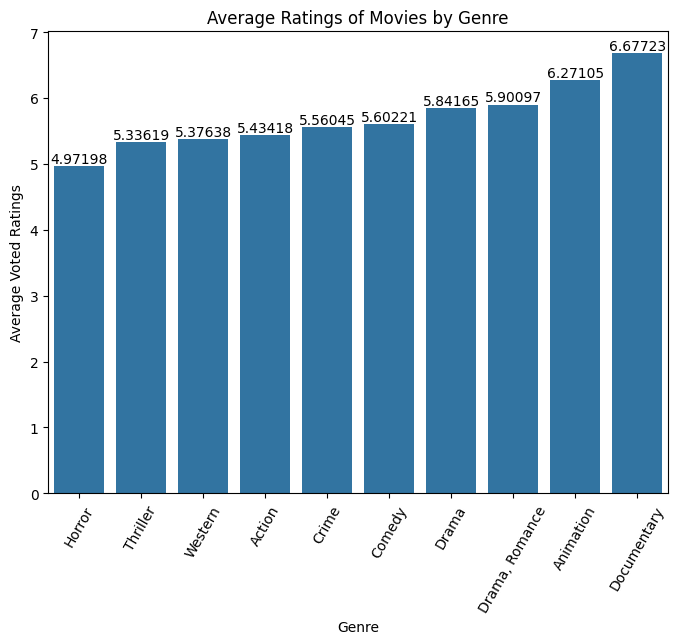

In [ ]:

fig, ax = plt.subplots(figsize = (8,6))
fig =  sns.barplot(x="genres", y = "vote_average",
             data=df_d_plot.sort_values(by="vote_average"))
plt.xlabel("Genre")
plt.ylabel("Average Voted Ratings")
plt.title("Average Ratings of Movies by Genre")
plt.xticks(rotation=60)
fig.bar_label(fig.containers[0])
plt.show()

#### (f) Distribution of vote_average by Original Language

In [ ]:
# convert production_countries to top 9 countries and 'others'
top_countries = df['production_countries'].value_counts().head(9)
df['production_countries'] =  df['production_countries'].apply(lambda x: 'Other' if x not in top_countries.index.tolist() else x)
# convert original_language to top 5 and others
top_lang = df['original_language'].value_counts().head(5)
df['original_language'] =  df['original_language'].apply(lambda x: 'Other' if x not in top_lang.index.tolist() else x)

<Axes: xlabel='vote_average', ylabel='original_language'>

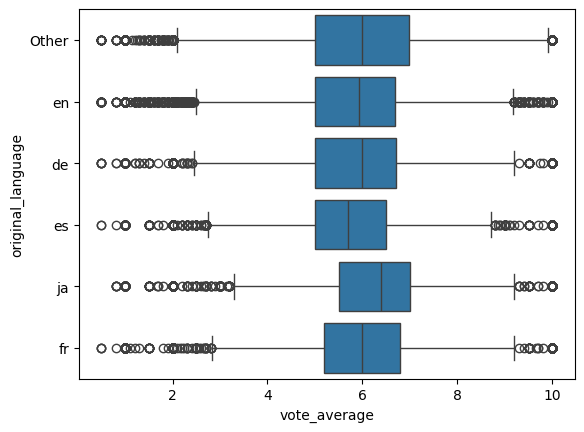

In [ ]:
sns.boxplot(x="vote_average", y = "original_language", data=df)

#### (g) Average Ratings by English vs. Non-English Speaking Movies by Release Decade

In [ ]:
df_lang = df.copy()
df_lang['original_language_cat'] = np.where(df_lang.original_language=="en", "English", "Non-English")
df_lang['release_year'] = pd.DatetimeIndex(df_lang['release_date']).year
df_lang['release_year_decade'] = df_lang['release_year'].apply(lambda x: str(int(x / 10) * 10) + 's')
df_lang = df_lang[['original_language_cat', 'release_year_decade', 'vote_average']]

In [ ]:
df_lang_plot = df_lang.groupby(['release_year_decade', 'original_language_cat'])['vote_average'].mean().reset_index()

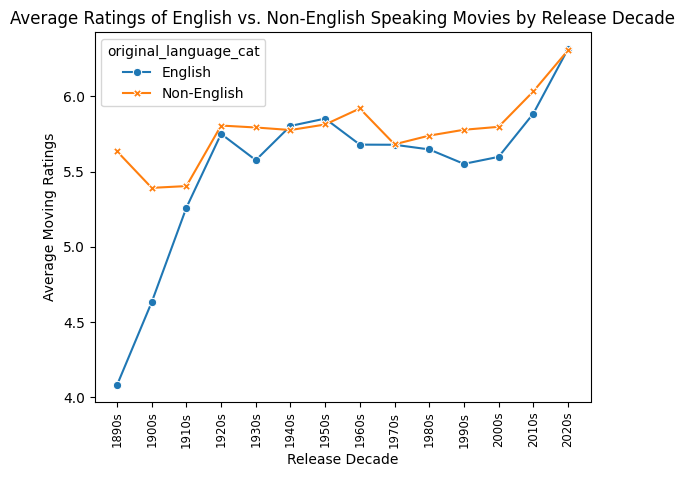

In [ ]:
p1 = sns.lineplot(x="release_year_decade", y="vote_average",
             hue="original_language_cat", style = "original_language_cat", markers = True,dashes = False,
             data=df_lang_plot.sort_values(by="release_year_decade"))
plt.xlabel("Release Decade")
plt.ylabel("Average Moving Ratings")
plt.title("Average Ratings of English vs. Non-English Speaking Movies by Release Decade")
#plt.legend()
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

## **1.3** Feature Engineering

Feature engineering is the process of applying domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms.

In [ ]:
# Number of unique values and datatype in each column
df.nunique()

id                      161005
title                   142864
vote_average              3964
vote_count                3781
status                       1
release_date             32413
runtime                    389
original_language            6
overview                157447
tagline                  56474
genres                    8763
production_companies     98521
production_countries        10
cast                    159310
director                 63473
writers                 125285
imdb_rating                 91
imdb_votes               18728
release_year_decade         14
release_year               130
release_month               12
dtype: int64

### 1.3.1 Categorical data transformation: Reduce categories with one-hot encoding
One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. With one-hot encoding, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns.

one hot encode the following columns:
  - `"genre"`
  - `"production_country"`
  - `"original_language"`
  - `"director"`
  - `"cast"`
  - `"writers"`

In [ ]:
df['production_countries'].value_counts()

production_countries
Other                       64974
United States of America    49249
Japan                        8294
United Kingdom               8197
France                       7118
India                        6343
Germany                      4952
Italy                        4723
Canada                       3880
Soviet Union                 3275
Name: count, dtype: int64

In [ ]:
# convert production_countries to top 9 countries and 'others'
top_countries = df['production_countries'].value_counts().head(9)
df['production_countries'] =  df['production_countries'].apply(lambda x: 'Other' if x not in top_countries.index.tolist() else x)
# convert original_language to top 5 and others
top_lang = df['original_language'].value_counts().head(5)
df['original_language'] =  df['original_language'].apply(lambda x: 'Other' if x not in top_lang.index.tolist() else x)


In [ ]:
# convert columns 'production_countries', 'original_language', 'genres' to one hot encode
one_hot = pd.get_dummies(df[['production_countries', 'original_language']], dtype = 'int')
encoded_df = df.drop(['production_countries', 'original_language'], axis = 1)
encoded_df = encoded_df.join(one_hot)

In [ ]:
encoded_df.head()

,id,title,vote_average,vote_count,status,release_date,runtime,overview,tagline,genres,production_companies,cast,director,writers,imdb_rating,imdb_votes,release_year_decade,release_year,release_month,production_countries_Canada,production_countries_France,production_countries_Germany,production_countries_India,production_countries_Italy,production_countries_Japan,production_countries_Other,production_countries_United Kingdom,production_countries_United States of America,original_language_Other,original_language_en,original_language_es,original_language_fr,original_language_ja
0,2,Ariel,7.107,326.0,Released,1988-10-21,73.0,After the coal mine he works at closes and his...,NaN,"Drama, Comedy, Romance, Crime",Villealfa Filmproductions,"Eino Kuusela, Olli Varja, Kauko Laalo, Hannu K...",Aki Kaurismäki,Aki Kaurismäki,7.4,8545.0,1980s,1988,10,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,3,Shadows in Paradise,7.300,368.0,Released,1986-10-17,74.0,"Nikander, a rubbish collector and would-be ent...",NaN,"Comedy, Drama, Romance",Villealfa Filmproductions,"Ari Korhonen, Pekka Laiho, Jukka-Pekka Palo, K...",Aki Kaurismäki,Aki Kaurismäki,7.5,7286.0,1980s,1986,10,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,5,Four Rooms,5.800,2578.0,Released,1995-12-09,98.0,It's Ted the Bellhop's first night on the job....,Twelve outrageous guests. Four scandalous requ...,Comedy,"Miramax, A Band Apart","Kimberly Blair, Sammi Davis, Paul Skemp, Bruce...","Alexandre Rockwell, Quentin Tarantino, Allison...","Alexandre Rockwell, Quentin Tarantino, Allison...",6.7,111710.0,1990s,1995,12,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,6,Judgment Night,6.500,326.0,Released,1993-10-15,109.0,"Four young friends, while taking a shortcut en...",Don't move. Don't whisper. Don't even breathe.,"Action, Crime, Thriller","Largo Entertainment, JVC, Universal Pictures","Doug Wert, Michael DeLorenzo, Everlast, Christ...",Stephen Hopkins,"Jere Cunningham, Lewis Colick",6.6,19024.0,1990s,1993,10,0,0,0,0,0,0,0,0,1,0,1,0,0,0
6,11,Star Wars,8.200,20262.0,Released,1977-05-25,121.0,Princess Leia is captured and held hostage by ...,"A long time ago in a galaxy far, far away...","Adventure, Action, Science Fiction","Lucasfilm Ltd., 20th Century Fox","Colin Higgins, Lorne Peterson, Graham Ashley, ...",George Lucas,George Lucas,8.6,1463022.0,1970s,1977,5,0,0,0,0,0,0,0,0,1,0,1,0,0,0


##### Genres

`Genres` is a concatenated column, where each movie can have multiple genres, separated by comma (,). In this section we separate each genre into each own column.





In [ ]:
# how many movies have more than 1 genre?
genres_cat = encoded_df['genres'].str.split(', ')

g_set = set()
for x in genres_cat:
    if (type(x) == type([0])):
        g_set = g_set.union(set(x))

print(g_set)


# replace NaN with empty list, for future operation
genres_cat.loc[genres_cat.isnull()] = genres_cat.loc[genres_cat.isnull()].apply(lambda x: [])

# counter for number of genres of each movie
g_length = genres_cat.apply(lambda x : len(x))

{'TV Movie', 'Science Fiction', 'Mystery', 'Thriller', 'Horror', 'History', 'Music', 'Documentary', 'War', 'Animation', 'Crime', 'Fantasy', 'Romance', 'Drama', 'Family', 'Adventure', 'Comedy', 'Action', 'Western'}


In [ ]:
# expand genres column by separating different genres into different columns
for g in g_set:
    encoded_df.loc[:,'genre_' + g] = genres_cat.apply(lambda x : 1 if g in x else 0)
df_expand = encoded_df.drop('genres', axis = 1)
df_expand.head()

,id,title,vote_average,vote_count,status,release_date,runtime,overview,tagline,production_companies,cast,director,writers,imdb_rating,imdb_votes,release_year_decade,release_year,release_month,production_countries_Canada,production_countries_France,production_countries_Germany,production_countries_India,production_countries_Italy,production_countries_Japan,production_countries_Other,production_countries_United Kingdom,production_countries_United States of America,original_language_Other,original_language_en,original_language_es,original_language_fr,original_language_ja,genre_TV Movie,genre_Science Fiction,genre_Mystery,genre_Thriller,genre_Horror,genre_History,genre_Music,genre_Documentary,genre_War,genre_Animation,genre_Crime,genre_Fantasy,genre_Romance,genre_Drama,genre_Family,genre_Adventure,genre_Comedy,genre_Action,genre_Western
0,2,Ariel,7.107,326.0,Released,1988-10-21,73.0,After the coal mine he works at closes and his...,NaN,Villealfa Filmproductions,"Eino Kuusela, Olli Varja, Kauko Laalo, Hannu K...",Aki Kaurismäki,Aki Kaurismäki,7.4,8545.0,1980s,1988,10,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0
1,3,Shadows in Paradise,7.300,368.0,Released,1986-10-17,74.0,"Nikander, a rubbish collector and would-be ent...",NaN,Villealfa Filmproductions,"Ari Korhonen, Pekka Laiho, Jukka-Pekka Palo, K...",Aki Kaurismäki,Aki Kaurismäki,7.5,7286.0,1980s,1986,10,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
2,5,Four Rooms,5.800,2578.0,Released,1995-12-09,98.0,It's Ted the Bellhop's first night on the job....,Twelve outrageous guests. Four scandalous requ...,"Miramax, A Band Apart","Kimberly Blair, Sammi Davis, Paul Skemp, Bruce...","Alexandre Rockwell, Quentin Tarantino, Allison...","Alexandre Rockwell, Quentin Tarantino, Allison...",6.7,111710.0,1990s,1995,12,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,6,Judgment Night,6.500,326.0,Released,1993-10-15,109.0,"Four young friends, while taking a shortcut en...",Don't move. Don't whisper. Don't even breathe.,"Largo Entertainment, JVC, Universal Pictures","Doug Wert, Michael DeLorenzo, Everlast, Christ...",Stephen Hopkins,"Jere Cunningham, Lewis Colick",6.6,19024.0,1990s,1993,10,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
6,11,Star Wars,8.200,20262.0,Released,1977-05-25,121.0,Princess Leia is captured and held hostage by ...,"A long time ago in a galaxy far, far away...","Lucasfilm Ltd., 20th Century Fox","Colin Higgins, Lorne Peterson, Graham Ashley, ...",George Lucas,George Lucas,8.6,1463022.0,1970s,1977,5,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [ ]:
### may need it for later to impute revenue and budget
# correlation viz using a subset of numeric_df
# sub_col = ['vote_count', 'vote_average','runtime', 'revenue','budget']
# numerics_df_sub = df_expand[sub_col]
# corr_mat_sub = numerics_df_sub.corr()
# corr_mat_sub.style.background_gradient(cmap='coolwarm')


### **1.3.2** Correlation of Feature Variables

With multiple features, it can be somewhat exhausting to do bivariate analysis on every possible pair of features. While you certainly should, your first instinct should be to check for the correlation between features since certain models (e.g. Linear Regression) won't work well if we have strong multicollinearity.

#### **Correlation Heatmap**

#### Isolating Numerics from Categorical Features

Before anything else, it may help to create groups of the numeric and categorical variables.

**Task:** is to split the dataframe into 2 dataframes:

1. `numerics_df`: This dataframe contains all numerical columns from `df`

2. `categorical_df`: This dataframe contains all categorical columns from `df`
  - i.e. the columns of non-numeric type or contain boolean values


In [ ]:
# Form 'numerics_df' and 'categorical_df'
filter_col = [col for col in df_expand if col.startswith(('genre_','original_language_','production_countries_', 'vote_', 'runtime', 'budget'))]
numerics_df = df_expand[filter_col]
# categorical_df = raw_expand[['status', '']]
numerics_df

,vote_average,vote_count,runtime,production_countries_Canada,production_countries_France,production_countries_Germany,production_countries_India,production_countries_Italy,production_countries_Japan,production_countries_Other,production_countries_United Kingdom,production_countries_United States of America,original_language_Other,original_language_en,original_language_es,original_language_fr,original_language_ja,genre_TV Movie,genre_Science Fiction,genre_Mystery,genre_Thriller,genre_Horror,genre_History,genre_Music,genre_Documentary,genre_War,genre_Animation,genre_Crime,genre_Fantasy,genre_Romance,genre_Drama,genre_Family,genre_Adventure,genre_Comedy,genre_Action,genre_Western
0,7.107,326.0,73.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0
1,7.300,368.0,74.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
2,5.800,2578.0,98.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,6.500,326.0,109.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
6,8.200,20262.0,121.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961331,10.000,1.0,40.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
961417,10.000,1.0,6.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
961740,10.000,1.0,31.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
961828,10.000,1.0,7.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
# sort the columns of `numerics_df` and `categorical_df` in alphabetic order
numerics_df.sort_index(axis=1, inplace=True)
# categorical_df.sort_index(axis=1, inplace=True)

<ipython-input-102-481d4bb8e04f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerics_df.sort_index(axis=1, inplace=True)


In [ ]:
corr_mat = numerics_df.corr()

<Axes: >

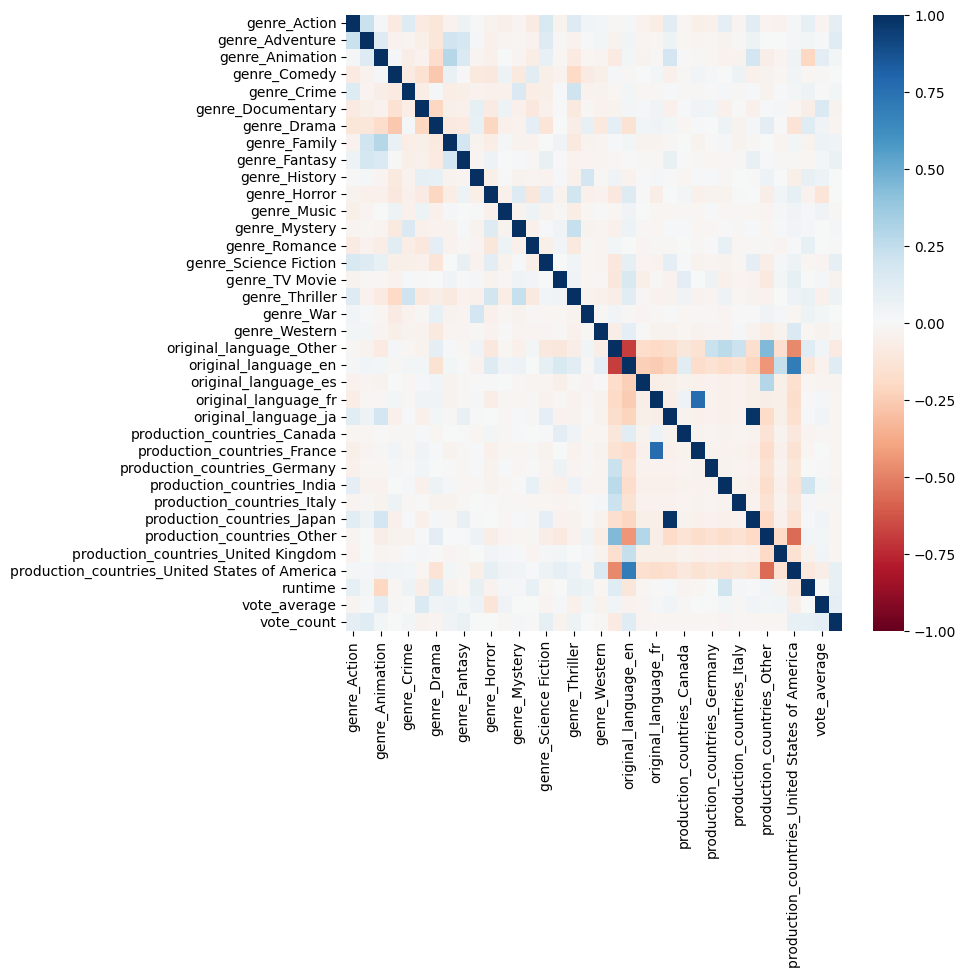

In [ ]:
fig, ax = plt.subplots(figsize = (8,8))
sns.heatmap(corr_mat, cmap = 'RdBu', vmin=-1, vmax=1)

# Part II: Predictive Modeling

##**2.1 Perform PCA on the one-hot-encoded data to improve modeling performance**



###2.1.1: **Address Multicollinearity before PCA**

####(a) Add voting category to copy of one-hot-encoded dataframe, numerics_df

In [ ]:
#first add "voting_category" to copy of one-hot-encoded df

# create bins or categories of vote_average, since it is useful to predict which range the vote_average falls into

#categories:
    #label 0: vote_average [0,5) = bad movie,
    #label 1: vote_average [5,8) = good movie
    #label 2: vote_average [8, 10] = great movie
bins = [0, 5, 8, 10]  # will need to again look at the distribution of vote_average to see what ranges make the most sense for categories

labels = [0, 1, 2]

#add new field for vote_category
df_for_PCA_raw = numerics_df.copy()
df_for_PCA_raw['voting_category'] = pd.cut(df_for_PCA_raw['vote_average'], bins = bins, labels = labels, include_lowest = True)
df_for_PCA_raw

,genre_Action,genre_Adventure,genre_Animation,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_History,genre_Horror,genre_Music,genre_Mystery,genre_Romance,genre_Science Fiction,genre_TV Movie,genre_Thriller,genre_War,genre_Western,original_language_Other,original_language_en,original_language_es,original_language_fr,original_language_ja,production_countries_Canada,production_countries_France,production_countries_Germany,production_countries_India,production_countries_Italy,production_countries_Japan,production_countries_Other,production_countries_United Kingdom,production_countries_United States of America,runtime,vote_average,vote_count,voting_category
0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,73.0,7.107,326.0,1
1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,74.0,7.300,368.0,1
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,98.0,5.800,2578.0,1
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,109.0,6.500,326.0,1
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,121.0,8.200,20262.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961331,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,40.0,10.000,1.0,2
961417,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,6.0,10.000,1.0,2
961740,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,31.0,10.000,1.0,2
961828,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,7.0,10.000,1.0,2


####(b) recreate correlation matrix and heatmap that includes 'voting category'

In [ ]:
corr_mat = df_for_PCA_raw.corr()
corr_mat

,genre_Action,genre_Adventure,genre_Animation,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_History,genre_Horror,genre_Music,genre_Mystery,genre_Romance,genre_Science Fiction,genre_TV Movie,genre_Thriller,genre_War,genre_Western,original_language_Other,original_language_en,original_language_es,original_language_fr,original_language_ja,production_countries_Canada,production_countries_France,production_countries_Germany,production_countries_India,production_countries_Italy,production_countries_Japan,production_countries_Other,production_countries_United Kingdom,production_countries_United States of America,runtime,vote_average,vote_count,voting_category
genre_Action,1.000000,0.225630,0.022058,-0.093525,0.135897,-0.089267,-0.120374,-0.041543,0.049696,-0.007388,-0.033481,-0.057880,-0.031235,-0.080001,0.161712,-0.036543,0.131049,0.038468,0.028901,-0.012358,0.019780,-0.046789,-0.071937,0.112062,-0.021697,-0.061387,-0.048958,0.099124,-0.030322,0.110657,-0.030522,-0.039153,0.020534,0.088663,-0.023566,0.095404,-0.024452
genre_Adventure,0.225630,1.000000,0.132681,-0.039364,-0.030118,-0.058659,-0.119873,0.198232,0.176192,0.019929,-0.054467,-0.029272,-0.016117,-0.045995,0.132303,-0.010216,-0.039531,0.015097,0.026605,-0.037016,0.035423,-0.023717,-0.022819,0.050559,-0.021124,-0.025755,-0.022752,-0.031795,-0.013874,0.049546,0.005149,0.000679,0.015936,0.027927,0.013972,0.120211,0.008119
genre_Animation,0.022058,0.132681,1.000000,0.021264,-0.063067,-0.046419,-0.179988,0.285425,0.150983,-0.027866,-0.053631,0.000628,-0.028189,-0.072132,0.080765,-0.021587,-0.086334,-0.019940,-0.027086,-0.088251,0.025888,-0.037287,-0.010752,0.182131,-0.006366,-0.013746,-0.023199,-0.045834,-0.034868,0.180749,-0.064320,-0.027904,0.044649,-0.205557,0.103064,0.027914,0.085434
genre_Comedy,-0.093525,-0.039364,0.021264,1.000000,-0.086447,-0.149046,-0.270549,0.066644,-0.000139,-0.101376,-0.104770,0.050564,-0.095995,0.112052,-0.058311,-0.039235,-0.199224,-0.081125,-0.059839,0.022624,-0.012601,0.003596,0.024755,-0.051575,-0.014602,0.035496,0.017085,0.006872,0.048874,-0.050069,-0.035837,-0.015909,0.031866,-0.022839,-0.013950,0.001620,-0.002785
genre_Crime,0.135897,-0.030118,-0.063067,-0.086447,1.000000,-0.073650,0.020801,-0.070458,-0.060800,-0.043475,-0.047669,-0.050940,0.149035,-0.073244,-0.055475,0.014465,0.210638,-0.046527,-0.033381,-0.022088,0.028412,-0.019081,-0.009813,0.014927,-0.013263,-0.008333,-0.000276,0.018308,-0.008991,0.015216,-0.033509,0.012945,0.026261,0.053706,-0.001335,0.025477,0.005123
genre_Documentary,-0.089267,-0.058659,-0.046419,-0.149046,-0.073650,1.000000,-0.215475,-0.056190,-0.053382,0.086722,-0.079407,0.049381,-0.054567,-0.102250,-0.054373,-0.001327,-0.099682,-0.014102,-0.039387,-0.037585,0.026899,0.020887,0.045327,-0.052486,0.012919,0.046359,0.033384,-0.050202,-0.003135,-0.052841,0.014998,0.021285,-0.016038,-0.063048,0.141016,-0.035735,0.109389
genre_Drama,-0.120374,-0.119873,-0.179988,-0.270549,0.020801,-0.215475,1.000000,-0.100344,-0.092070,0.079336,-0.211544,-0.052687,-0.039404,0.098114,-0.125485,0.002845,-0.063913,0.079884,-0.094811,0.096534,-0.141177,0.037107,0.040409,0.024582,-0.016188,0.014100,0.005097,0.048576,-0.037505,0.023058,0.108646,-0.005930,-0.134338,0.123069,0.046234,-0.025351,0.046912
genre_Family,-0.041543,0.198232,0.285425,0.066644,-0.070458,-0.056190,-0.100344,1.000000,0.183147,-0.035305,-0.075572,0.020412,-0.037454,-0.040268,0.000641,0.040162,-0.094343,-0.033210,-0.024713,0.014281,0.028837,-0.036535,-0.037512,-0.014253,0.006679,-0.035423,-0.001711,0.021069,-0.034168,-0.014551,0.007174,-0.024970,0.029037,-0.037235,0.059368,0.039402,0.056229
genre_Fantasy,0.049696,0.176192,0.150983,-0.000139,-0.060800,-0.053382,-0.092070,0.183147,1.000000,-0.028880,0.055057,0.006271,0.009482,-0.015127,0.074406,-0.004211,-0.044609,-0.029424,-0.030855,-0.019929,-0.000209,-0.014585,-0.014486,0.074622,-0.000159,-0.009749,-0.018726,-0.020711,-0.013503,0.071789,0.008080,-0.009424,-0.013501,-0.018959,0.026482,0

<Axes: >

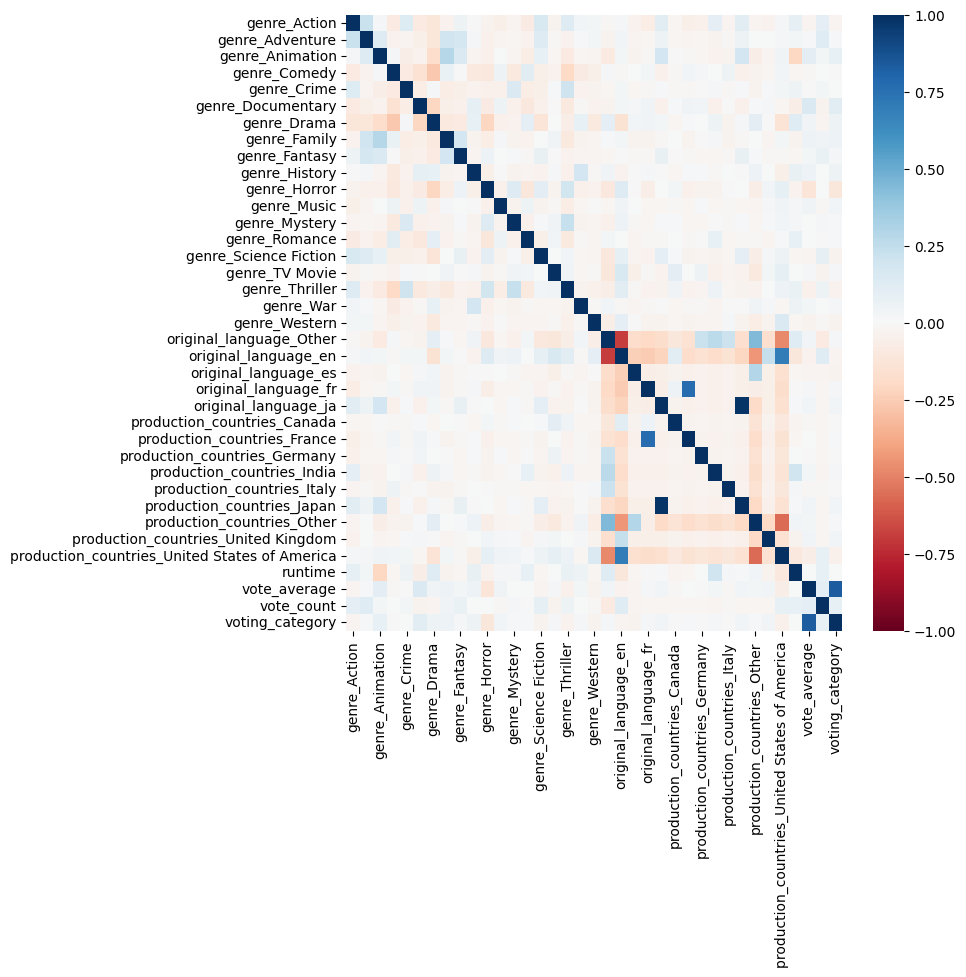

In [ ]:
#Heatmap of new one-hot-encoded DF containing voting_catory
fig, ax = plt.subplots(figsize = (8,8))
sns.heatmap(corr_mat, cmap = 'RdBu', vmin=-1, vmax=1)

####(c) flatten correlation matrix and identify highly correlated pairs as absolute correlation > 0.70

In [ ]:
# drop columns that are highly correlated

#Note: vote_category and vote_average are highly correlated

#first flatten the correlation matrix
pairs = corr_mat.stack().reset_index()
pairs.columns = ['Feature1', 'Feature2', 'Correlation']

#Remove diagonal pairs
pairs = pairs[pairs['Feature1'] != pairs['Feature2']]

#Filter pairs with absolute correlation near 1
corr_threshold = 0.7
high_corr_pairs = pairs[pairs['Correlation'].abs() > corr_threshold]

#Sort pairs by abs corr in desc order
high_corr_pairs = high_corr_pairs.sort_values(by = 'Correlation', ascending = False)

print(high_corr_pairs)

                         Feature1                     Feature2  Correlation
880          original_language_ja   production_countries_Japan     0.980676
1096   production_countries_Japan         original_language_ja     0.980676
1294                 vote_average              voting_category     0.834830
1366              voting_category                 vote_average     0.834830
839          original_language_fr  production_countries_France     0.767692
947   production_countries_France         original_language_fr     0.767692


#####Note: "Vote_Category" and "Vote_Average" are highly correlated, at ~0.80, as expected.
#####***May use corr to vote_average to determine final list of explanatory variables for each of Categorical and Regression models

####(d) Find the features to drop and add to a set to ensure no duplicates
* drop a feature from each highly correlated pair
* the feature to be dropped has lowest correlation with voting_average
* a lower correlation with voting_average means it will contribute less to explaining voting average variance

In [ ]:
#set features to drop to a set to ensure no duplicates
features_to_drop = set()

#first drop highly correlated pairs containing both 'voting_category' and 'vote_average', since these are targets for categorical and regression models
high_corr_pairs = high_corr_pairs[~((high_corr_pairs['Feature1'].isin(['vote_average', 'voting_category']) |
                          high_corr_pairs['Feature2'].isin(['vote_average', 'voting_category'])))]

#iterate over pairs and compare correlation with target = vote_average
for i, row in high_corr_pairs.iterrows():
    feature1 = row['Feature1']
    feature2 = row['Feature2']

    #check correlation with target, where target is assumed to be
    corr_with_target_f1 = abs(numerics_df['vote_average'].corr(numerics_df[feature1]))
    corr_with_target_f2 = abs(numerics_df['vote_average'].corr(numerics_df[feature2]))

    print(f"Corr feature '{feature1}' correlation to target is: {corr_with_target_f1:.4f}")
    print(f"Corr feature '{feature2}' correlation to target is: {corr_with_target_f2:.4f}")
    #for feature with lower absolute correction, add to features_to_drop set
    if corr_with_target_f1 < corr_with_target_f2:
        features_to_drop.add(feature1)
    else:
        features_to_drop.add(feature2)

print(features_to_drop)

Corr feature 'original_language_ja' correlation to target is: 0.0384
Corr feature 'production_countries_Japan' correlation to target is: 0.0367
Corr feature 'production_countries_Japan' correlation to target is: 0.0367
Corr feature 'original_language_ja' correlation to target is: 0.0384
Corr feature 'original_language_fr' correlation to target is: 0.0164
Corr feature 'production_countries_France' correlation to target is: 0.0073
Corr feature 'production_countries_France' correlation to target is: 0.0073
Corr feature 'original_language_fr' correlation to target is: 0.0164
{'production_countries_Japan', 'production_countries_France'}


### **2.1.2 Perform PCA on reduced data**

####(a) set dataframe for PCA by dropping unneeded data from 2.2.1

In [ ]:
#change features to drop to list
features_to_drop_list = list(features_to_drop)

df_for_PCA = numerics_df.drop(columns = features_to_drop_list)

df_for_PCA

,genre_Action,genre_Adventure,genre_Animation,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_History,genre_Horror,genre_Music,genre_Mystery,genre_Romance,genre_Science Fiction,genre_TV Movie,genre_Thriller,genre_War,genre_Western,original_language_Other,original_language_en,original_language_es,original_language_fr,original_language_ja,production_countries_Canada,production_countries_Germany,production_countries_India,production_countries_Italy,production_countries_Other,production_countries_United Kingdom,production_countries_United States of America,runtime,vote_average,vote_count
0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,73.0,7.107,326.0
1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,74.0,7.300,368.0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,98.0,5.800,2578.0
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,109.0,6.500,326.0
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,121.0,8.200,20262.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961331,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,40.0,10.000,1.0
961417,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,6.0,10.000,1.0
961740,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,31.0,10.000,1.0
961828,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,7.0,10.000,1.0


####(b) Set target and features, then perform PCA

In [ ]:
# save target variable
target = df_for_PCA['vote_average']
print(target.shape)

(161005,)


In [ ]:
# save features, less target feature to features variable
features = df_for_PCA.drop('vote_average', axis = 1)
print(features.shape)

(161005, 33)


In [ ]:
# Assign appropriate value to seed and conduct 80/20 train-test split with random_state = seed
seed = 42
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = seed)

In [ ]:
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()

#Fit scaler to the data and transform it
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA with no specific number of components
pca = PCA(random_state = 42)

# Fit PCA on the scaled data
pca.fit(X_train_scaled)

# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_

####(c) Create cumulative explained Variance graph to determine number of explanatory features required to explain most of the variance of 'vote_average'

In [ ]:
# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

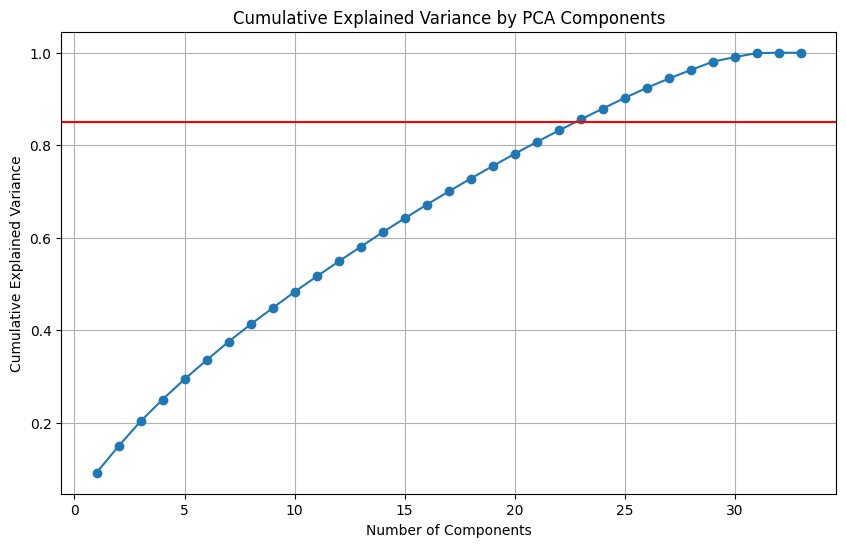

In [ ]:
# Plotting the cumulative explained variance
plt.figure(figsize=(10, 6))
#modify the x axis to begin at 1
n_components = range(1, len(cumulative_explained_variance) + 1)
plt.plot(n_components, cumulative_explained_variance, marker = 'o')

plt.axhline(y = 0.85, color = 'r', linestyle = '-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.show()

###**2.1.3 Final PCA for Regression Models**

In [ ]:
# Create final pca using fewer components

# 1. Refit and transform on training with parameter n (as deduced from the last step)
pca_final = PCA(n_components = 23, random_state = 42)
pca_final

PCA(n_components=23, random_state=42)

##**2.2 Regression model: predict numeric value of voting average**

For regression models, we use Root Mean Squared Error (RMSE) to evaluate models by measuring the average difference between predicted values and the actual values.

###**2.2.1 Regular Linear Regression**

In [ ]:
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

features = numerics_df.drop('vote_average', axis = 1)
target = numerics_df['vote_average']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    features, target,
    test_size = 0.2,
    random_state = 42)

In [ ]:
features

,genre_Action,genre_Adventure,genre_Animation,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_History,genre_Horror,genre_Music,genre_Mystery,genre_Romance,genre_Science Fiction,genre_TV Movie,genre_Thriller,genre_War,genre_Western,original_language_Other,original_language_en,original_language_es,original_language_fr,original_language_ja,production_countries_Canada,production_countries_France,production_countries_Germany,production_countries_India,production_countries_Italy,production_countries_Japan,production_countries_Other,production_countries_United Kingdom,production_countries_United States of America,runtime,vote_count
0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,73.0,326.0
1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,74.0,368.0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,98.0,2578.0
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,109.0,326.0
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,121.0,20262.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961331,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,40.0,1.0
961417,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,6.0,1.0
961740,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,31.0,1.0
961828,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,7.0,1.0


In [ ]:
reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)

# lin_reg_score = reg.score(X_test, y_test)
# lin_reg_score

# RMSE
lin_reg_score = mean_squared_error(y_test, y_pred, squared = False)
lin_reg_score

1.4839241993393262

In [ ]:
print(reg.intercept_, reg.coef_, lin_reg_score)

5.565447608998479 [-4.32041848e-02 -6.95470086e-04  7.51499969e-01  1.17222681e-01
  9.24228757e-02  1.09946872e+00  2.83387624e-01  2.17797746e-01
  1.33604241e-01  3.22629228e-01 -3.49740570e-01  3.34286588e-01
  2.55784270e-01  1.80337018e-02 -9.22901086e-02  2.01666161e-01
 -3.34203385e-02  1.46418202e-01  2.67498065e-03  9.20173966e-03
 -9.45445592e-02 -2.39945876e-01  1.76794423e-02  3.07609253e-01
 -1.72516936e-02 -6.43212799e-02 -1.68769121e-01  2.48660261e-01
 -8.90216098e-02 -1.46763241e-01  4.60590884e-02  2.95094042e-01
 -1.03686446e-01 -4.58709262e-05  1.96584665e-04] 1.4839241993393262


### **2.2.2 Linear Regression with PCA**

In [ ]:
X_train_pca = pca_final.fit_transform(X_train_scaled)
X_test_pca = pca_final.transform(X_test_scaled)

In [ ]:
lin_reg_pca = LinearRegression()
lin_reg_pca.fit(X_train_pca, y_train)

# Use the model to predict on the PCA transformed test set and save these predictions as `y_pred`
y_pred_pca = lin_reg_pca.predict(X_test_pca)

# Find the accuracy and store the value in `test_accuracy`
# test_accuracy = lin_reg_pca.score(X_test_pca, y_test)
# test_accuracy = np.float64(test_accuracy)
# test_accuracy

# RMSE
lin_reg_pca_score = mean_squared_error(y_test, y_pred_pca, squared = False)
lin_reg_pca_score

1.4918816566185915

#### Lasso Regression


In [ ]:
from sklearn.linear_model import Lasso

# Initialize model with alpha = 10 (keep other hyperparameters as default values) and fit it on the training set
reg_lasso = Lasso(alpha = 1).fit(X_train, y_train)
y_pred_lasso = reg_lasso.predict(X_test)

# R-squared score
# ridge_score = reg_ridge.score(X_test, y_test)
# ridge_score

# RMSE
lin_reg_lasso_score = mean_squared_error(y_test, y_pred_lasso, squared = False)
lin_reg_lasso_score

1.5364231075076569

#### Ridge Regression
Next step: apply ridge regression to help with multicollinearity and overfitting.

In [ ]:
from sklearn.linear_model import Ridge

# Initialize model with alpha = 10 (keep other hyperparameters as default values) and fit it on the training set
reg_ridge = Ridge(alpha = 10).fit(X_train, y_train)
y_pred_ridge = reg_ridge.predict(X_test)

# R-squared score
# ridge_score = reg_ridge.score(X_test, y_test)
# ridge_score

# RMSE
lin_reg_ridge_score = mean_squared_error(y_test, y_pred_ridge, squared = False)
lin_reg_ridge_score

1.4839133064664751

### 2.2.3 Tree-based Regression

#### Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

DTregressor = DecisionTreeRegressor(random_state = seed, max_depth = 10).fit(X_train, y_train)

y_pred_dt = DTregressor.predict(X_test)
# dtr_score = DTregressor.score(X_test, y_test)
# dtr_score

y_pred_dt_score = mean_squared_error(y_test, y_pred_dt, squared = False)
y_pred_dt_score

1.422834530056403

#### Randome Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# TO-DO: Initialize model with default parameters and fit it on the training set
reg_rf = RandomForestRegressor(random_state = seed, max_depth = 10).fit(X_train, y_train)

# TO-DO: Use the model to predict on the test set and save these predictions as `y_pred`
y_pred_rf = reg_rf.predict(X_test)

# TO-DO: Find the R-squared score and store the value in `rfr_score`
# rfr_score = reg_rf.score(X_test, y_pred_rf)
# rfr_score

y_pred_rf_score = mean_squared_error(y_test, y_pred_rf, squared = False)
y_pred_rf_score

1.4055588241396995

#### Gradient Boosting Regression

In [ ]:
import xgboost as xgb

model = xgb.XGBRegressor(n_estimators=50, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8, random_state = seed)

reg_xgb = model.fit(X_train, y_train)

y_pred_xgb = reg_xgb.predict(X_test)

y_pred_xgb_score = mean_squared_error(y_test, y_pred_xgb, squared = False)
y_pred_xgb_score


1.3912836937769157

### 2.2.4 Conclusion
Based on the RMSEs from all the regression models, we can see that overall tree-based models perform slightly better than the rest. Among all, XGBoost yields the smallest RMSE, which mekes sense as it is the most robust of all.

In [ ]:
print('List of performance, based on RMSE:\n')
print('1.0. Regular Linear Regression:', lin_reg_score)
print('1.1. Regular Linear Regression with PCA:', lin_reg_pca_score)
print('1.2. Regular Linear Regression with Lasso:', lin_reg_lasso_score)
print('1.3. Regular Linear Regression with Ridge:', lin_reg_ridge_score)
print('2.1. Tree based - Decision Tree:', y_pred_dt_score)
print('2.2. Tree based - Random Forest:', y_pred_rf_score)
print('2.3. Tree based - XGBoost:', y_pred_xgb_score)

List of performance, based on RMSE:

1.0. Regular Linear Regression: 1.4839241993393262
1.1. Regular Linear Regression with PCA: 1.4918816566185915
1.2. Regular Linear Regression with Lasso: 1.5364231075076569
1.3. Regular Linear Regression with Ridge: 1.4839133064664751
2.1. Tree based - Decision Tree: 1.422834530056403
2.2. Tree based - Random Forest: 1.4055588241396995
2.3. Tree based - XGBoost: 1.3912836937769157
